# Projet MLOps: Segmentation des clients Olist

## Notebook 1: Analyse

Ce jeu de données a été rendu disponible par l'entreprise brésilienne Olist Store. Il renferme des informations sur 100000 commandes effectuées entre 2016 et 2018 au niveau de divers marché au Brésil. Il s'agit de données commerciales réelles anonymisées et les références aux entreprises et partenaires ont été remplacé par du texte de Game of Thrones. Il contient des informations sur les clients et leur localisation. Il peut être utilisé pour identifier les clients dans l'ensemble des commandes ainsi que leur livraison.</br> 

Notre objectif est donc d’aide Olist à comprendre les différents types d’utilisateurs sur la base d'une segmentation basé sur le comportement des clients En nous basant sur les transactions historiques des clients, nous allons tenter d'analyser les données et de créer des variable qui nous permettrons de traduire leur comporetement. Comprendre ces comportements permettra de regrouper différents clients en groupes.</br>

Dans ce notebook nous allons procéder à l'analyse du jeu de données dont le schéma est représenté dans la figure suivante:

<img src="../images/olist.png" alt="dataset_configuration" width="1200"/>

Nous allons donc utiliser les jeux de données ci-dessous afin de créer un jeu de données final pour effectuer la modélisation et l'analyse exploratoire:
- olist_orders_dataset
- olist_order_payments_dataset
- olist_products_dataset
- olist_order_items_dataset
- olist_sellers_dataset
- olist_order_customer_dataset

Les jeux de données olist_order_reviews_dataset et olist_geolocation_dataset ne seront pas utilisés car ils ne nous fournissent pas d'informations particulièrement pertinentes pour notre cas d'usage.

## Import des bibliothèques

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import sys
import warnings
import pendulum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno
from loguru import logger


from ydata_profiling import ProfileReport

sys.path.append(str(Path.cwd().parent))
from settings.params import PARAMS
from src.load_dataset import load_data

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 25)
warnings.filterwarnings("ignore")

/Users/massamba/Desktop/MLOps/house_price/tp_mlops/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set logging format
log_fmt = (
    "<blue>{time:YYYY-MM-DD HH:mm:ss.SSS!UTC}</blue> | "
    "<level>{level: <8}</level> | "
    "<green>{name}</green>:<magenta>{function}</magenta>:<yellow>{line}</yellow> | "
    "<cyan>Thread: {thread.name}</cyan> | "
    "<white>PID: {process}</white> - {message}"
)
logger.configure(handlers=[{'sink': sys.stderr, 'format': log_fmt}])

# Current date
CURRENT_DATE = pendulum.now(tz="UTC")

# Directories
PROJECT_DIR = Path.cwd().parent
DATA_DIR = Path(PROJECT_DIR, "olist_dataset")
REPORTS_DIR = Path(PROJECT_DIR, "reports")
OUTPUTS_DIR = Path(PROJECT_DIR, "output_files")

logger.info(f"Project directory: {PROJECT_DIR}, Reports directory: {REPORTS_DIR}, Outputs directory: {OUTPUTS_DIR}")

2024-08-04 15:18:04.140 | INFO     | __main__:<module>:20 | Thread: MainThread | PID: 44392 - Project directory: /Users/massamba/Desktop/MLOps/projet_mlops, Reports directory: /Users/massamba/Desktop/MLOps/projet_mlops/reports, Outputs directory: /Users/massamba/Desktop/MLOps/projet_mlops/output_files


## Chargement et nettoyage du dataframe customer

In [3]:
customers_df = load_data(f"{DATA_DIR}/olist_customers_dataset.csv")

2024-08-04 15:18:04.193 | INFO     | src.load_dataset:load_data:17 | Thread: MainThread | PID: 44392 - Dataset path to load /Users/massamba/Desktop/MLOps/projet_mlops/olist_dataset/olist_customers_dataset.csv


2024-08-04 15:18:04.307 | INFO     | src.load_dataset:load_data:27 | Thread: MainThread | PID: 44392 - Data shape: (99441, 5)


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
5  879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
6  fd826e7cf63160e536e0908c76c3f441  addec96d2e059c80c30fe6871d30d177   
7  5e274e7a0c3809e14aba7ad5aae0d407  57b2a98a409812fe9618067b6b8ebe4f   
8  5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
9  4b7139f34592b3a31687243a302fa75b  9afe194fb833f79e300e37e580171f22   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo          

### Suppression des duplicatats et gestion des valeurs nulles

In [4]:
print(len(customers_df))
customers_df.drop_duplicates(inplace=True)
print(len(customers_df))

99441
99441


In [5]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

## Chargement et nettoyage du dataframe order items

In [6]:
order_items_df = load_data(f"{DATA_DIR}/olist_order_items_dataset.csv")

2024-08-04 15:18:04.532 | INFO     | src.load_dataset:load_data:17 | Thread: MainThread | PID: 44392 - Dataset path to load /Users/massamba/Desktop/MLOps/projet_mlops/olist_dataset/olist_order_items_dataset.csv


2024-08-04 15:18:04.686 | INFO     | src.load_dataset:load_data:27 | Thread: MainThread | PID: 44392 - Data shape: (112650, 7)


                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   
5  00048cc3ae777c65dbb7d2a0634bc1ea              1   
6  00054e8431b9d7675808bcb819fb4a32              1   
7  000576fe39319847cbb9d288c5617fa6              1   
8  0005a1a1728c9d785b8e2b08b904576c              1   
9  0005f50442cb953dcd1d21e1fb923495              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df5

### Suppression des duplicatats et gestion des valeurs nulles

In [7]:
print(len(order_items_df))
order_items_df.drop_duplicates(inplace=True)
print(len(order_items_df))

112650
112650


In [8]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### Suppression de colonnes inutiles
La colonne shipping_limit_date n'est pas utilie pour notre analyse, nous allons donc la supprimer

In [9]:
order_items_df.drop("shipping_limit_date", axis=1, inplace=True)
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


## Chargement et nettoyage du dataframe order payments

In [10]:
order_payments_df = load_data(f"{DATA_DIR}/olist_order_payments_dataset.csv")

2024-08-04 15:18:05.017 | INFO     | src.load_dataset:load_data:17 | Thread: MainThread | PID: 44392 - Dataset path to load /Users/massamba/Desktop/MLOps/projet_mlops/olist_dataset/olist_order_payments_dataset.csv


2024-08-04 15:18:05.081 | INFO     | src.load_dataset:load_data:27 | Thread: MainThread | PID: 44392 - Data shape: (103886, 5)


                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
5  298fcdf1f73eb413e4d26d01b25bc1cd                   1  credit_card   
6  771ee386b001f06208a7419e4fc1bbd7                   1  credit_card   
7  3d7239c394a212faae122962df514ac7                   1  credit_card   
8  1f78449c87a54faf9e96e88ba1491fa9                   1  credit_card   
9  0573b5e23cbd798006520e1d5b4c6714                   1       boleto   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4 

### Suppression des duplicatats et gestion des valeurs nulles

In [11]:
print(len(order_payments_df))
order_payments_df.drop_duplicates(inplace=True)
print(len(order_payments_df))

103886
103886


In [12]:
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

## Chargement et nettoyage du dataframe orders

In [13]:
orders_df = load_data(f"{DATA_DIR}/olist_orders_dataset.csv")

2024-08-04 15:18:05.279 | INFO     | src.load_dataset:load_data:17 | Thread: MainThread | PID: 44392 - Dataset path to load /Users/massamba/Desktop/MLOps/projet_mlops/olist_dataset/olist_orders_dataset.csv


2024-08-04 15:18:05.534 | INFO     | src.load_dataset:load_data:27 | Thread: MainThread | PID: 44392 - Data shape: (99441, 8)


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9  e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2   

### Suppression des duplicatats et gestion des valeurs nulles

In [14]:
print(len(orders_df))
orders_df.drop_duplicates(inplace=True)
print(len(orders_df))

99441
99441


In [15]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dans ce cas, il nous manque des informations concernant la livraison ou l'approbation de la commande, ce qui n'entrave pas particulièrement notre analyse, donc nous allons procéder tel quel.

### Suppression des colonnes inutiles
Nous allons ici supprimer les colonnes contenant les dates de livraison et d'approbation, car elles ne sont pas utiles pour notre analyse.

In [16]:
orders_df.drop(["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"], axis=1, inplace=True)
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


### Vérification des types de données

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.8+ MB


Nous allons convertir la colonne *order_purchase_timestamp* en type datetime car elle est actuellement sous forme de chaîne de caractères

In [18]:
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.8+ MB


## Chargement et nettoyage du dataframe products

In [19]:
products_df = load_data(f"{DATA_DIR}/olist_products_dataset.csv")

2024-08-04 15:18:06.139 | INFO     | src.load_dataset:load_data:17 | Thread: MainThread | PID: 44392 - Dataset path to load /Users/massamba/Desktop/MLOps/projet_mlops/olist_dataset/olist_products_dataset.csv


2024-08-04 15:18:06.171 | INFO     | src.load_dataset:load_data:27 | Thread: MainThread | PID: 44392 - Data shape: (32951, 9)


                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   
5  41d3672d4792049fa1779bb35283ed13  instrumentos_musicais   
6  732bd381ad09e530fe0a5f457d81becb             cool_stuff   
7  2548af3e6e77a690cf3eb6368e9ab61e       moveis_decoracao   
8  37cc742be07708b53a98702e77a21a02       eletrodomesticos   
9  8c92109888e8cdf9d66dc7e463025574             brinquedos   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.

### Suppression des duplicatats et gestion des valeurs nulles

In [20]:
print(len(products_df))
products_df.drop_duplicates(inplace=True)
print(len(products_df))

32951
32951


In [21]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Comme il n'y a pas beaucoup de valeurs nulles par rapport au nombre total d'enregistrements, cela ne constitue pas particulièrement un obstacle, nous allons donc continuer.

### Suppression des colonnes inutiles
À part *product_id* et *product_category_name*, les autres colonnes ne sont pas utiles pour notre analyse, nous allons donc les supprimer.

In [22]:
products_df = products_df[["product_id", "product_category_name"]]
products_df.head(5)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


### Chargement et nettoyage du dataframe sellers

In [23]:
sellers_df = load_data(f"{DATA_DIR}/olist_sellers_dataset.csv")

2024-08-04 15:18:06.424 | INFO     | src.load_dataset:load_data:17 | Thread: MainThread | PID: 44392 - Dataset path to load /Users/massamba/Desktop/MLOps/projet_mlops/olist_dataset/olist_sellers_dataset.csv


2024-08-04 15:18:06.428 | INFO     | src.load_dataset:load_data:27 | Thread: MainThread | PID: 44392 - Data shape: (3095, 4)


                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   
5  c240c4061717ac1806ae6ee72be3533b                   20920   
6  e49c26c3edfa46d227d5121a6b6e4d37                   55325   
7  1b938a7ec6ac5061a66a3766e0e75f90                   16304   
8  768a86e36ad6aae3d03ee3c6433d61df                    1529   
9  ccc4bbb5f32a6ab2b7066a4130f114e3                   80310   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  
5     rio de janeiro           RJ  
6             brejao           PE  
7          penapol

### Suppression des duplicatats et gestion des valeurs nulles

In [24]:
print(len(sellers_df))
sellers_df.drop_duplicates(inplace=True)
print(len(sellers_df))

3095
3095


In [25]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

## Traduction de la colonne product_category_name

In [26]:
translate_df = load_data(f"{DATA_DIR}/product_category_name_translation.csv")

2024-08-04 15:18:06.590 | INFO     | src.load_dataset:load_data:17 | Thread: MainThread | PID: 44392 - Dataset path to load /Users/massamba/Desktop/MLOps/projet_mlops/olist_dataset/product_category_name_translation.csv


2024-08-04 15:18:06.592 | INFO     | src.load_dataset:load_data:27 | Thread: MainThread | PID: 44392 - Data shape: (71, 2)


    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor
5           esporte_lazer                sports_leisure
6              perfumaria                     perfumery
7   utilidades_domesticas                    housewares
8               telefonia                     telephony
9      relogios_presentes                 watches_gifts


In [27]:
translate_dict = dict()
for record in translate_df.to_records():
    translate_dict[record[1]] = record[2]

translate_dict

{'beleza_saude': 'health_beauty',
 'informatica_acessorios': 'computers_accessories',
 'automotivo': 'auto',
 'cama_mesa_banho': 'bed_bath_table',
 'moveis_decoracao': 'furniture_decor',
 'esporte_lazer': 'sports_leisure',
 'perfumaria': 'perfumery',
 'utilidades_domesticas': 'housewares',
 'telefonia': 'telephony',
 'relogios_presentes': 'watches_gifts',
 'alimentos_bebidas': 'food_drink',
 'bebes': 'baby',
 'papelaria': 'stationery',
 'tablets_impressao_imagem': 'tablets_printing_image',
 'brinquedos': 'toys',
 'telefonia_fixa': 'fixed_telephony',
 'ferramentas_jardim': 'garden_tools',
 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
 'eletroportateis': 'small_appliances',
 'consoles_games': 'consoles_games',
 'audio': 'audio',
 'fashion_calcados': 'fashion_shoes',
 'cool_stuff': 'cool_stuff',
 'malas_acessorios': 'luggage_accessories',
 'climatizacao': 'air_conditioning',
 'construcao_ferramentas_construcao': 'construction_tools_construction',
 'moveis_cozinha_area_de_ser

In [28]:
products_df["product_category_name"] = products_df["product_category_name"].replace(translate_dict)
products_df.head(10)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares
5,41d3672d4792049fa1779bb35283ed13,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,furniture_decor
8,37cc742be07708b53a98702e77a21a02,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,toys


## Fusionner les dataframes

In [29]:
final_df = orders_df.merge(order_items_df, on="order_id", how="left")
final_df = final_df.merge(order_payments_df, on="order_id", how="outer")
final_df = final_df.merge(products_df, on="product_id", how="outer")
final_df = final_df.merge(customers_df, on="customer_id", how="outer")
final_df = final_df.merge(sellers_df, on="seller_id", how="outer")

In [30]:
final_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,1.0,credit_card,1.0,18.12,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3.0,voucher,1.0,2.00,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,2.0,voucher,1.0,18.59,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,1.0,credit_card,3.0,37.77,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,1.0,credit_card,1.0,37.77,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,79.00,14.13,1.0,boleto,1.0,93.13,construction_tools_lights,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,13660.0,porto ferreira,SP
118430,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,1.0,241a1ffc9cf969b27de6e72301020268,8501d82f68d23148b6d78bb7c4a42037,19.70,10.96,1.0,credit_card,1.0,30.66,auto,78a159045124eb7601951b917a42034f,89111,gaspar,SC,89031.0,blumenau,SC
118431,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,399.00,45.07,1.0,debit_card,1.0,444.07,furniture_decor,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,13478.0,americana,SP
118432,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,1.0,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,219.90,24.12,1.0,credit_card,4.0,244.02,furniture_decor,e55e436481078787e32349cee9febf5e,39803,teofilo otoni,MG,8320.0,sao paulo,SP


### Suppression des duplicatats et gestion des valeurs nulles

In [31]:
final_df.duplicated().sum()

0

In [32]:
final_df.isnull().sum()

order_id                       0
customer_id                    0
order_status                   0
order_purchase_timestamp       0
order_item_id                830
product_id                   830
seller_id                    830
price                        830
freight_value                830
payment_sequential             3
payment_type                   3
payment_installments           3
payment_value                  3
product_category_name       2528
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
seller_zip_code_prefix       830
seller_city                  830
seller_state                 830
dtype: int64

Nous supprimons les valeurs nulles et sauvegardons dans un nouveau fichier

In [33]:
final_df.dropna(inplace=True)
final_df.isnull().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
order_item_id               0
product_id                  0
seller_id                   0
price                       0
freight_value               0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
product_category_name       0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
seller_zip_code_prefix      0
seller_city                 0
seller_state                0
dtype: int64

In [34]:
final_df.to_csv(f"{OUTPUTS_DIR}/segmentation_01_analyse_step1.csv")

### Séparation en caractérisitiques quantitatives et qualitative

In [35]:
np.object = object

numerical_features = final_df.select_dtypes(exclude=[object]).columns
categorical_features = final_df.select_dtypes(include=[object]).columns

In [36]:
numerical_features, categorical_features

(Index(['order_purchase_timestamp', 'order_item_id', 'price', 'freight_value',
        'payment_sequential', 'payment_installments', 'payment_value',
        'customer_zip_code_prefix', 'seller_zip_code_prefix'],
       dtype='object'),
 Index(['order_id', 'customer_id', 'order_status', 'product_id', 'seller_id',
        'payment_type', 'product_category_name', 'customer_unique_id',
        'customer_city', 'customer_state', 'seller_city', 'seller_state'],
       dtype='object'))

In [37]:
final_df[numerical_features].describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,seller_zip_code_prefix
count,115903.000000,115903.000000,115903.000000,115903.000000,115903.000000,115903.000000,115903.000000,115903.000000
mean,1.196302,120.947333,20.075493,1.092819,2.945411,173.035495,35052.624022,24501.641338
std,0.699505,184.260929,15.869972,0.725241,2.779911,268.128335,29813.124839,27623.385869
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1003.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,61.010000,11320.000000,6429.000000
50%,1.000000,74.900000,16.320000,1.000000,2.000000,108.200000,24315.000000,13660.000000
75%,1.000000,134.900000,21.220000,1.000000,4.000000,189.740000,58540.000000,28495.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,99980.000000,99730.000000


In [38]:
final_df[categorical_features].describe()

,order_id,customer_id,order_status,product_id,seller_id,payment_type,product_category_name,customer_unique_id,customer_city,customer_state,seller_city,seller_state
count,115903,115903,115903,115903,115903,115903,115903,115903,115903,115903,115903,115903
unique,97276,97276,7,32341,3035,4,73,94107,4095,27,604,23
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,credit_card,bed_bath_table,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,sao paulo,SP
freq,63,63,113407,536,2133,85536,11823,75,18278,48850,28928,82626


## EDA: Exploratory Data Analysis

In [39]:
final_df.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,1.0,credit_card,1.0,18.12,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3.0,voucher,1.0,2.00,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,2.0,voucher,1.0,18.59,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,1.0,credit_card,3.0,37.77,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.0,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,1.0,credit_card,1.0,37.77,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.0,maua,SP
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,1.0,boleto,1.0,44.09,housewares,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,9350.0,maua,SP
6,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,75.90,7.79,1.0,credit_card,1.0,83.69,baby,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,9350.0,maua,SP
7,88407c8c6e12493ff6e845df39540112,e902cb9d9992a69a267f69dec57aa3a3,delivered,2017-08-15 02:03:01,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,75.90,7.79,1.0,credit_card,2.0,83.69,baby,28adbfbaf0b9c5e5a0555a8c853a7534,13060,campinas,SP,9350.0,maua,SP
8,4f2acff0b7d2bcc4a408abe5a223d407,d67b6cca5a87299f711a6961f579fe67,delivered,2017-08-01 16:31:35,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,75.90,14.28,1.0,boleto,1.0,90.18,baby,aea90564d6f09ae11bf936f55ed49d72,82030,curitiba,PR,9350.0,maua,SP
9,019aaee09698daf81dcffe9d94a18b5c,e3893e579755de4feb1a4d0313c103fa,delivered,2017-08-10 14:04:58,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,75.90,7.79,1.0,credit_card,2.0,83.69,baby,cd6b577df45c00daa6b2767eaa947c72,13092,campinas,SP,9350.0,maua,SP


### Vérification des valeurs manquantes

<Axes: >

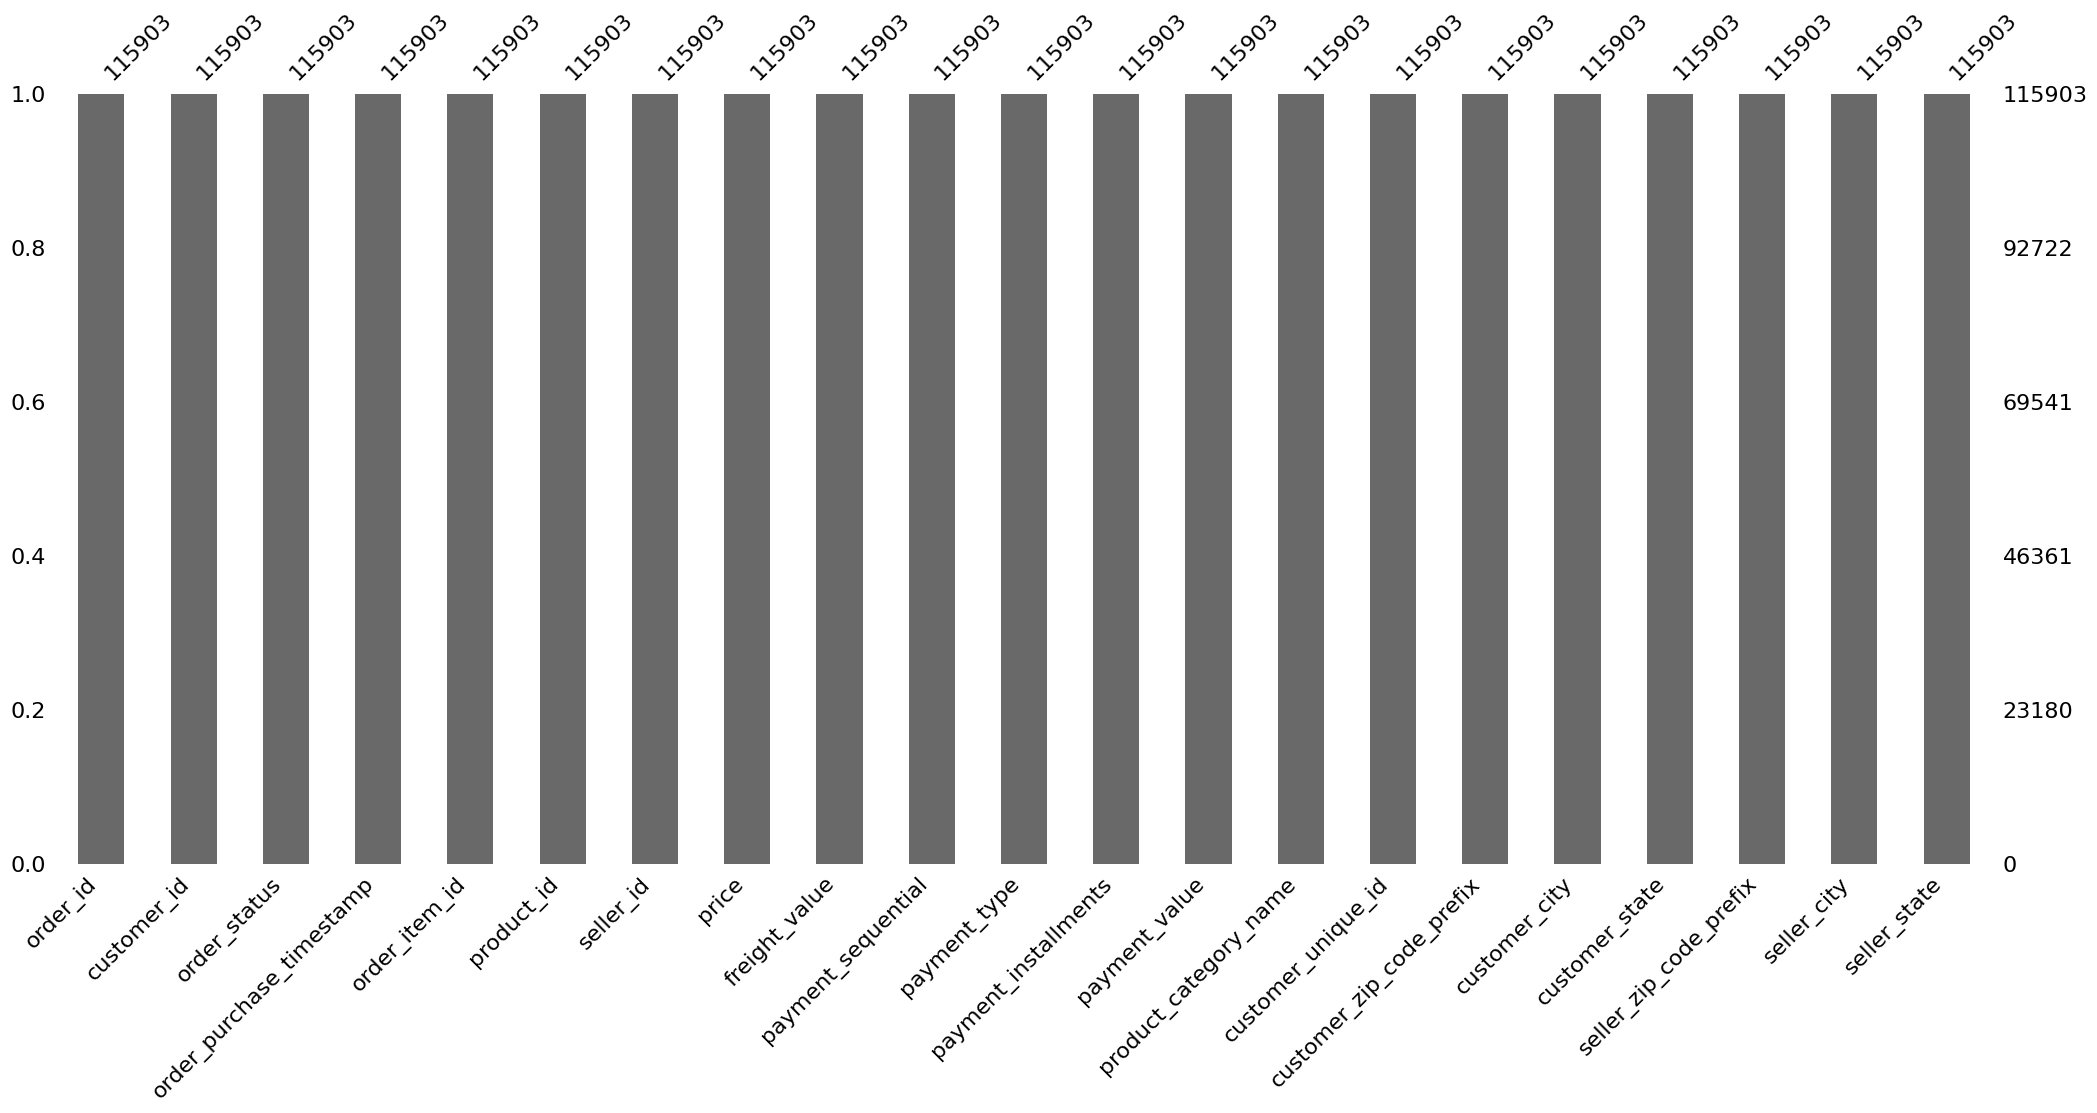

In [40]:
msno.bar(final_df, p=PARAMS["MIN_COMPLETION_RATE"], filter="top")

### Visualisation des données

#### Visualisation des caractéristiques quantitatives

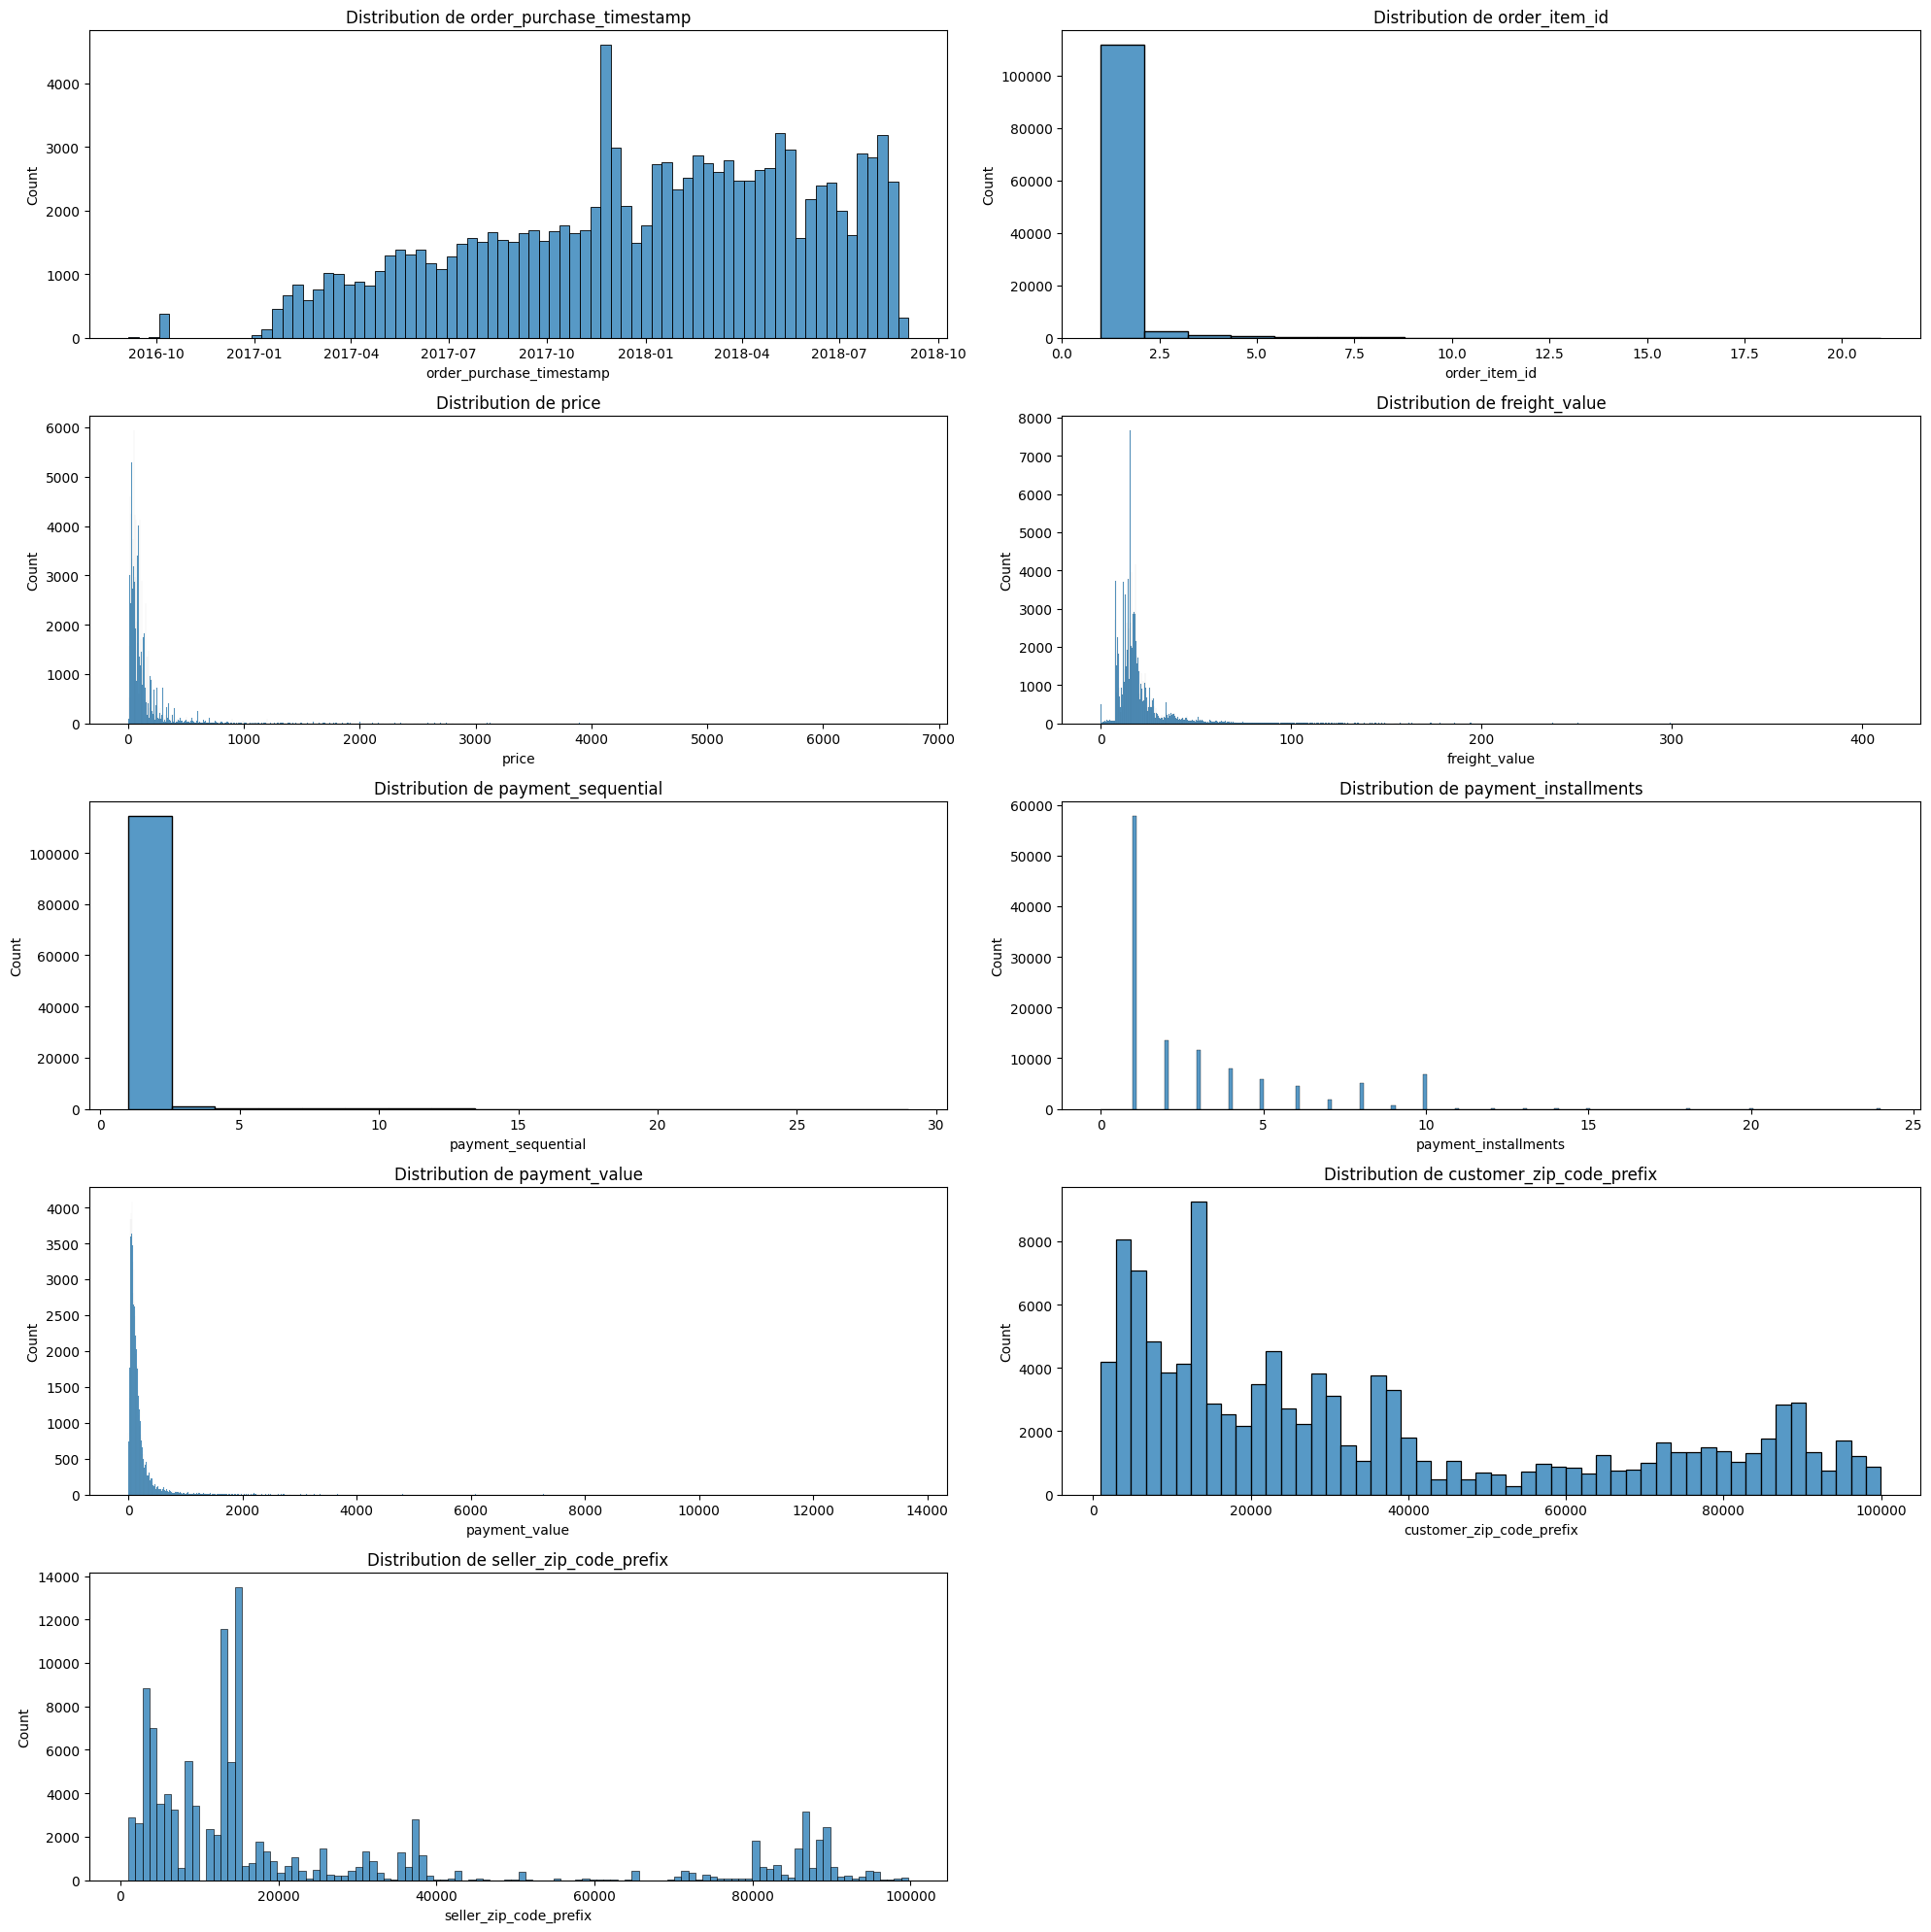

In [41]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))

i = 0
j = 0
for feat in numerical_features:
    sns.histplot(final_df[feat], ax=axes[i,j])
    axes[i, j].set_title(f"Distribution de {feat}")
    j += 1
    if j == 2:
        i += 1
        j = 0
    if i == 5:
        break

fig.delaxes(axes[4, 1])


plt.tight_layout()
plt.show()


**Interpretations**

- Distribution de *order_purchase_timestamp*

Comme nous pouvons le voir sur le graphique, le nombre de commandes semble présenter de grandes variations au fil du temps, atteignant un pic vers le milieu de l'année 2018. Il pourrait être nécessaire de tracer la distribution en fonction du mois et de l'année pour mieux comprendre son évolution.

- Distribution de *order_item_id*

Comme nous pouvons le voir sur le graphique, la plupart des commandes comportent très peu d'articles, principalement autour de 1 à 2 articles.

- Distribion de *price*, *freight_value* and *payment_value*

Comme nous pouvons le voir, la plupart des prix sont concentrés sur les valeurs les plus basses, ce qui rend la distribution asymétrique. De même, pour la *freight_value* et la *payment_value*, la plupart des valeurs sont relativement faibles.</br>Il pourrait être utile d'effectuer une transformation logarithmique afin de normaliser ces distributions, car elles sont directement utilisées dans l'analyse RFM.

- Distribution de *payment_sequnetial*

Comme nous pouvons le voir sur la distribution, la plupart des paiements sont réglés en une seule fois, avec très peu de paiements effectués en plusieurs séquences.

- Distribution de *payment_installments*

Comme nous pouvons le constater, la majorité des clients optent pour un nombre réduit de paiements échelonnés, avec une tendance à la baisse à mesure que le nombre de paiements augmente.

- Distribution de *customer_zip_code_prefix* and *seller_zip_code_prefix* 

Ces distributions indiquent qu'il existe une base de clients et de vendeurs diversifiée, répartie sur divers codes postaux et états, certaines zones ayant une densité plus élevée. Il pourrait être intéressant d'explorer plus en profondeur les données de localisation par la suite.

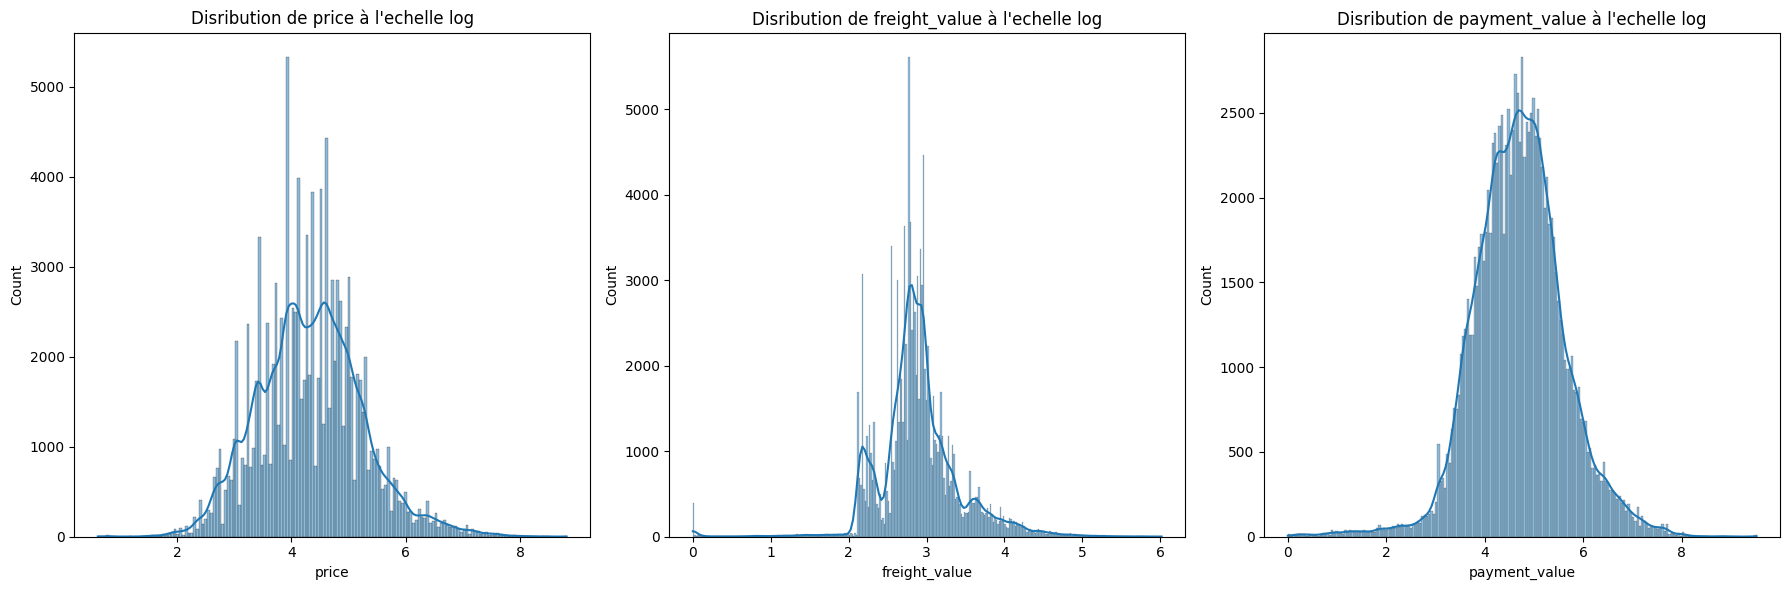

In [42]:
log_transform_columns = ["price", "freight_value", "payment_value"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(len(log_transform_columns)):
    sns.histplot(np.log1p(final_df[log_transform_columns[i]]), ax=axes[i], kde=True)
    axes[i].set_title(f"Disribution de {log_transform_columns[i]} à l'echelle log")

plt.tight_layout()
plt.show()

Comme nous pouvons le voir la transformation à l'échelle logarithme aide quelque peu à normaliser la distribution bien qu'insuffisante

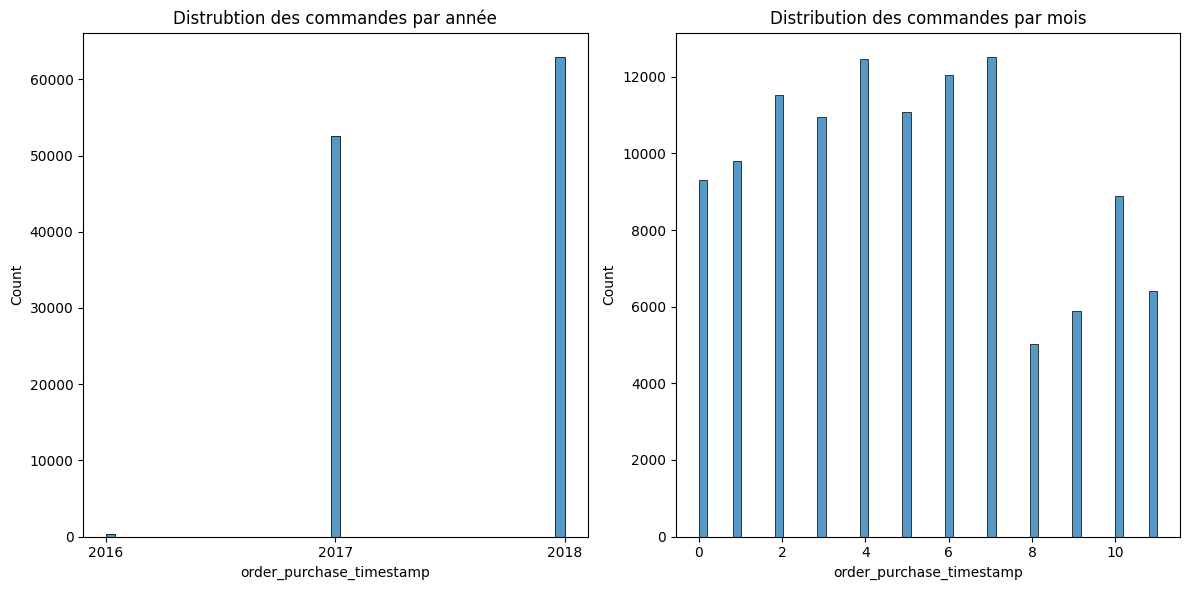

In [43]:
order_purchase_year = final_df["order_purchase_timestamp"].dt.year
order_purchase_month = final_df["order_purchase_timestamp"].dt.month - 1

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(order_purchase_year, ax=axes[0])
unique_years = sorted(order_purchase_year.unique())
axes[0].set_xticks(unique_years)
axes[0].set_xticklabels(unique_years)
axes[0].set_title("Distrubtion des commandes par année")
sns.histplot(order_purchase_month, ax=axes[1])
axes[1].set_title("Distribution des commandes par mois")


plt.tight_layout()
plt.show()

Nous pouvons constaté que le nombre de commandes portant sur 2016 est faible donc nous allons supprimer ces lignes de notre jeu de données

In [44]:
final_df['year'] = order_purchase_year
final_df = final_df[final_df['year'] != 2016].copy()
final_df.drop("year", axis=1, inplace=True)

#### Visualisation pour les caractéristiques qualitatives

In [45]:
categorical_features

Index(['order_id', 'customer_id', 'order_status', 'product_id', 'seller_id',
       'payment_type', 'product_category_name', 'customer_unique_id',
       'customer_city', 'customer_state', 'seller_city', 'seller_state'],
      dtype='object')

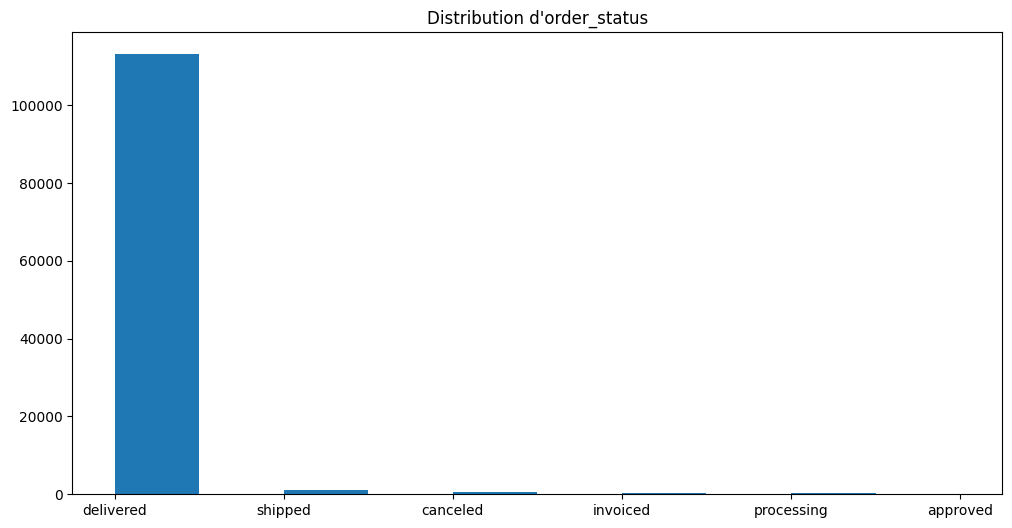

In [46]:
plt.figure(figsize=(12, 6))
plt.hist(final_df["order_status"])
plt.title("Distribution d'order_status")
plt.show()

Comme nous pouvons le voir sur le graphique, la plupart des commandes ont le statut "delivered", avec très peu de commandes pour les autres statuts.

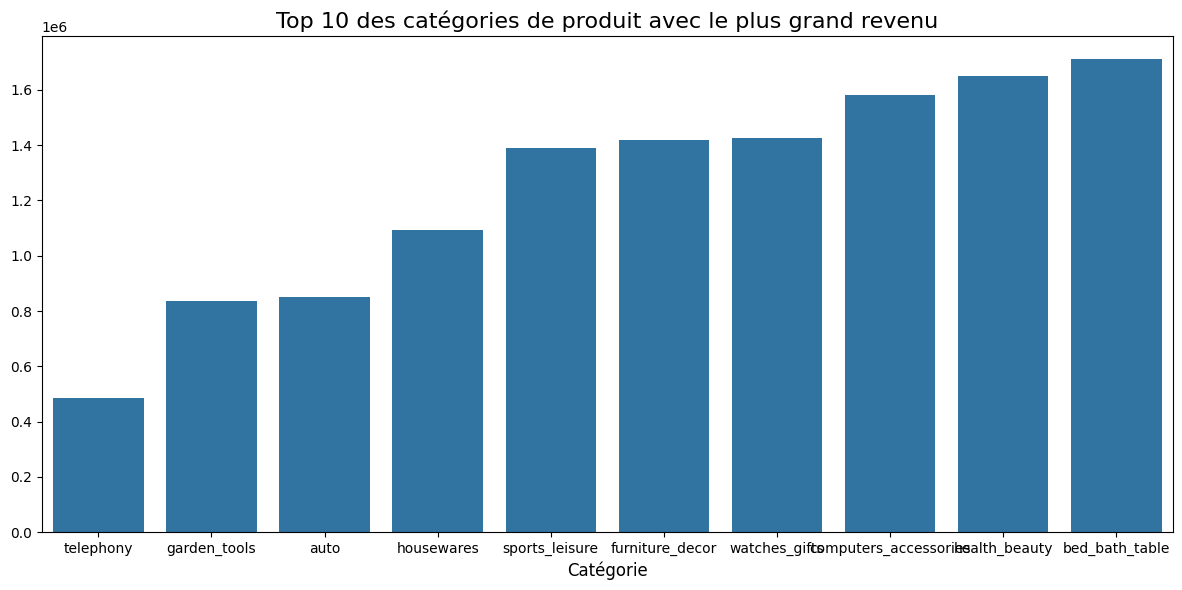

In [47]:
top_10_product = final_df['product_category_name'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_product = final_df[final_df['product_category_name'].isin(top_10_product)]
df_price_cat = final_df['payment_type'].value_counts().sort_values()/len(final_df['payment_type'])*100


plt.figure(figsize=(12, 6))
df_top10 = df_top_10_product.groupby('product_category_name')['payment_value'].sum().sort_values()
sns.barplot(x=df_top10.index, y=df_top10.values)    
plt.title('Top 10 des catégories de produit avec le plus grand revenu', size=16)
plt.xlabel('Catégorie',size=12)
plt.tight_layout()
plt.show()

Comme nous pouvons le voir les catégories bed_bath_table, healh_beauty et computer accessories sont celles qui apportent le plus de revenu

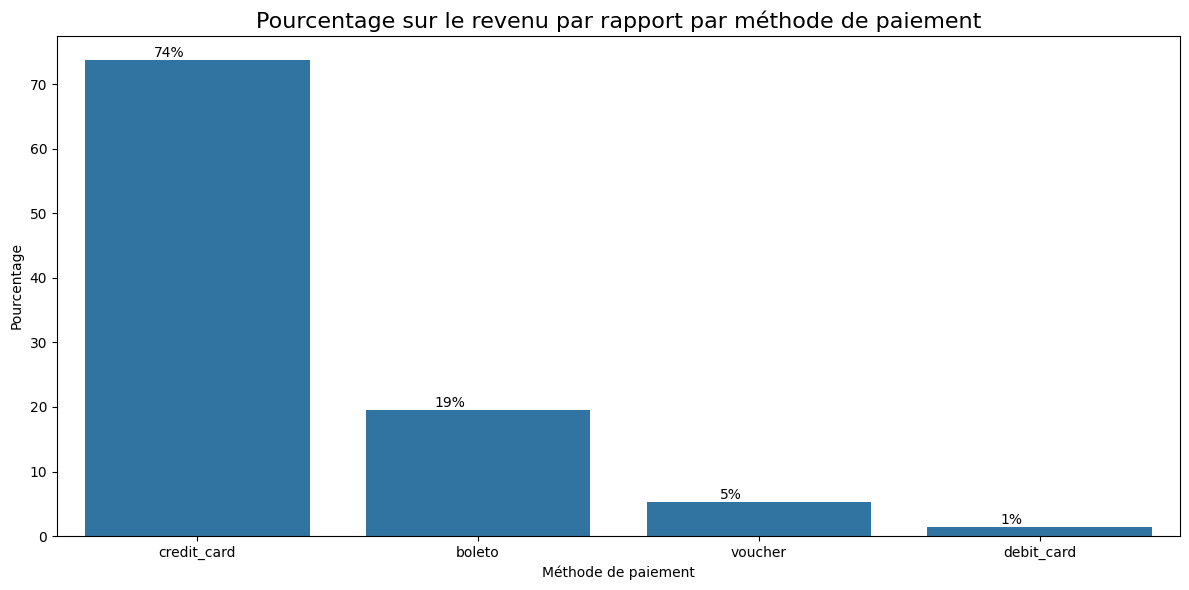

In [48]:
plt.figure(figsize=(12, 6))
df_pay_type = final_df['payment_type'].value_counts()/len(final_df['payment_type'])*100
graph = sns.barplot(x=df_pay_type.index, y=df_pay_type.values)  
for p in graph.patches:
        graph.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.title('Pourcentage sur le revenu par rapport par méthode de paiement', size=16)
plt.ylabel('Pourcentage')
plt.xlabel('Méthode de paiement')
plt.tight_layout()
plt.show()

Comme nous pouvons le voir la majorité des transactions sont faites par carte de crédit avec 74% suivi de boleto qui correspond à une méthode de paiement par cash avec 19%.
Ceci peut traduire une opportunité d'attirer de nouveaux utilisateurs e-commerce traduisant l'opportunité de travailler avec des fournisseurs de cartes de crédit pour proposer des promotions ou des cartes de fidélité afin d'attirer de nouveaux utilisateurs et de fidéliser les utilisateurs existants.

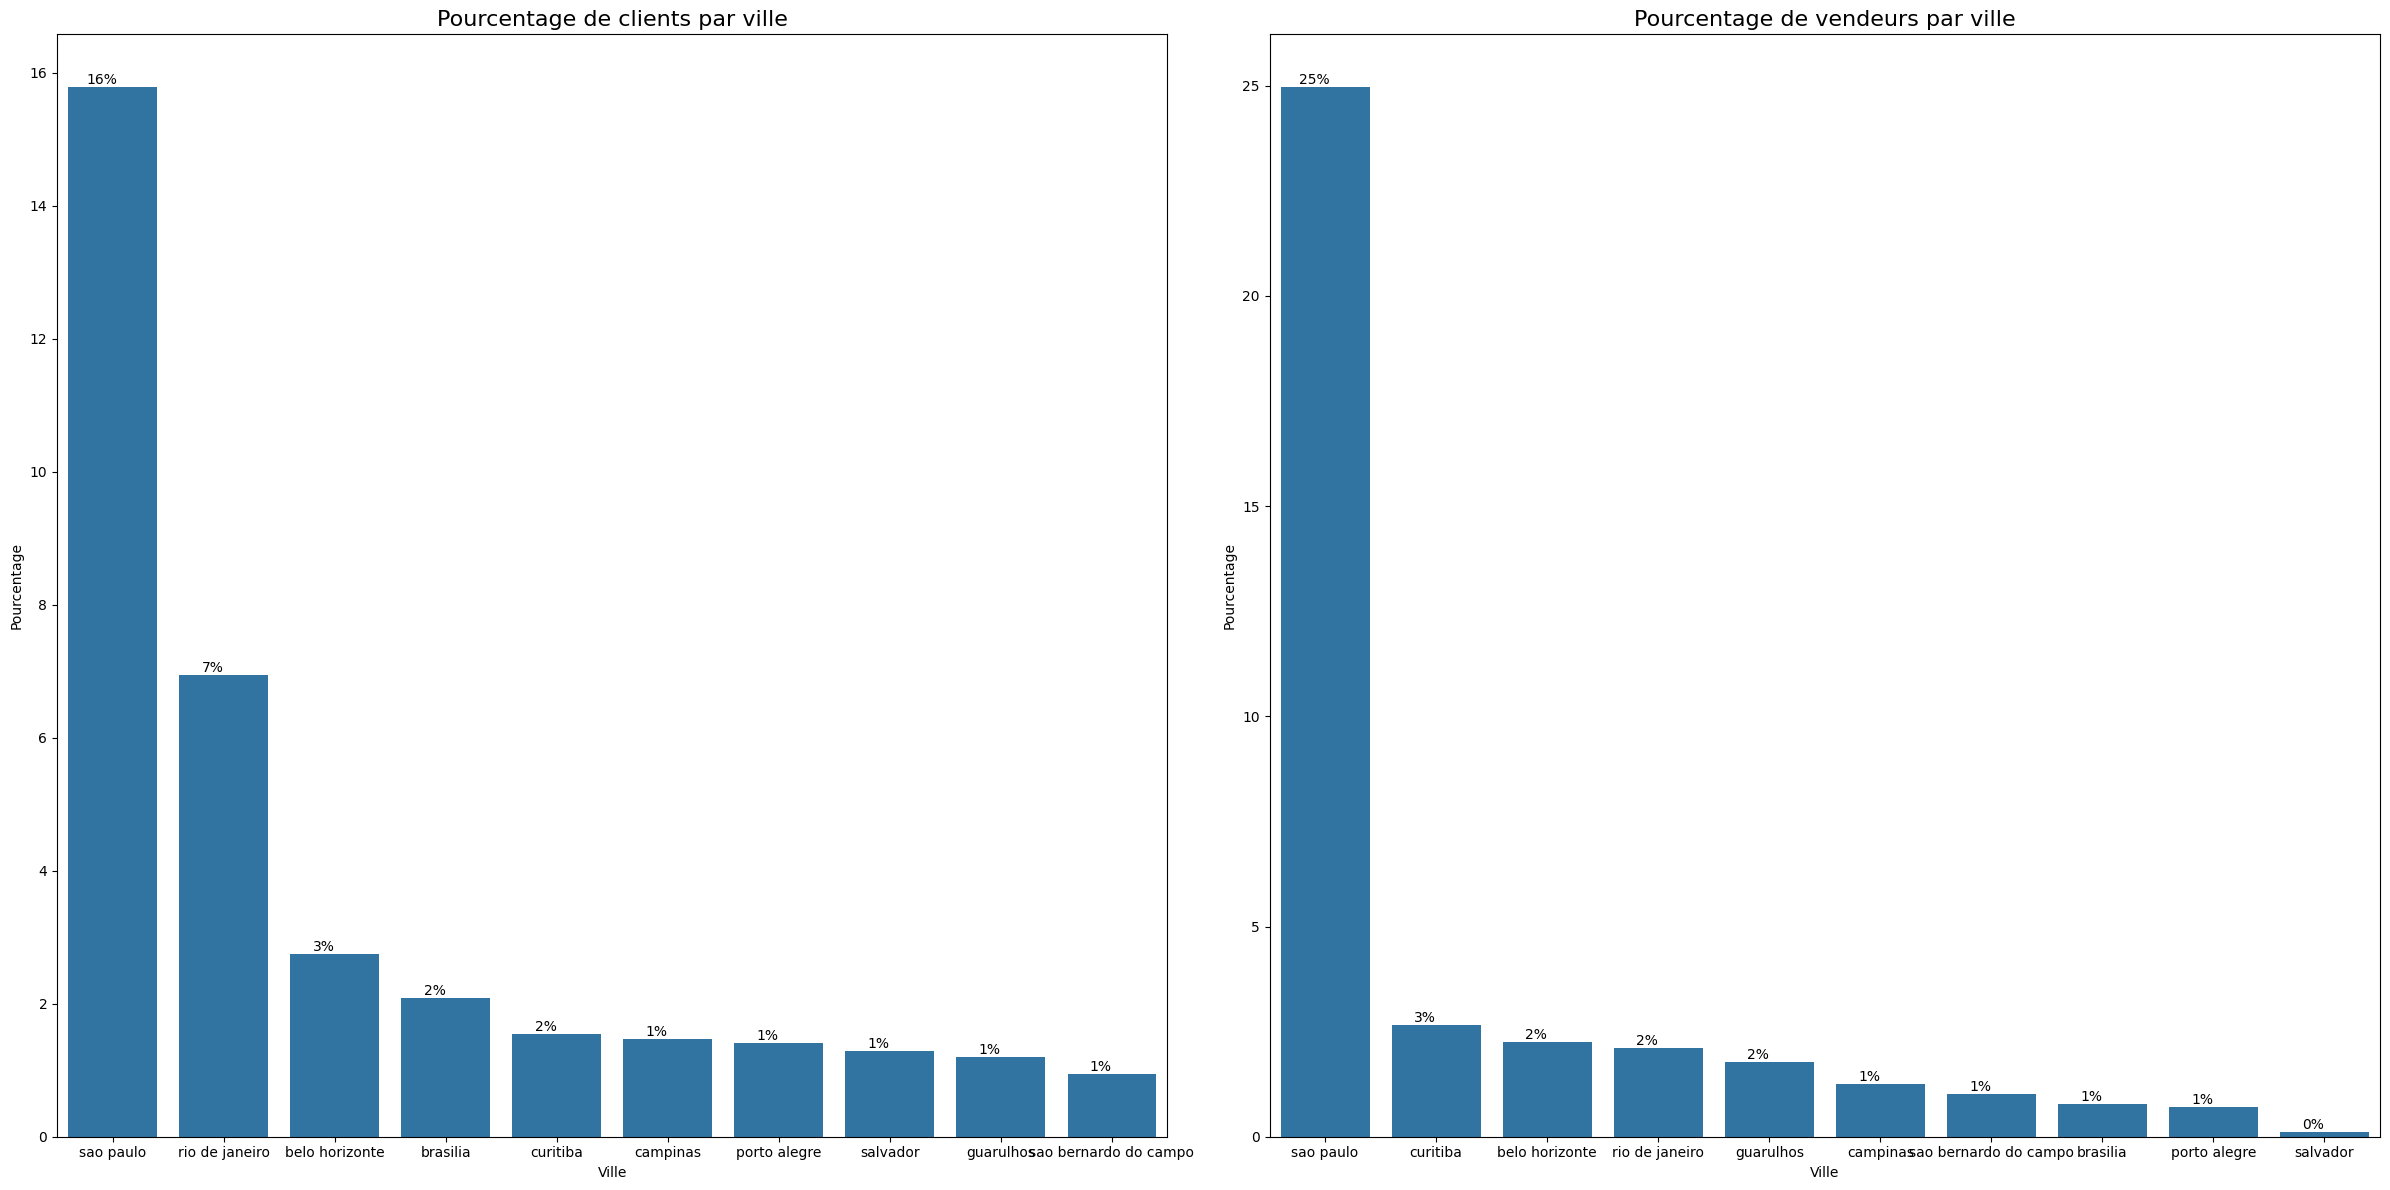

In [49]:
top_10_customer_city = final_df['customer_city'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_customer_city = final_df[final_df['customer_city'].isin(top_10_customer_city)]
top_10_seller_city = final_df['seller_city'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_seller_city = final_df[final_df['seller_city'].isin(top_10_customer_city)]

fig, axes  = plt.subplots(1,2,figsize=(24, 12))

df_customer = df_top_10_customer_city['customer_city'].value_counts()/len(final_df['customer_city'])*100
graph = sns.barplot(x=df_customer.index, y=df_customer.values, ax=axes[0])
for p in graph.patches:
        graph.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
axes[0].set_title('Pourcentage de clients par ville', size=16)
axes[0].set_ylabel('Pourcentage')
axes[0].set_xlabel('Ville')

df_seller = df_top_10_seller_city['seller_city'].value_counts()/len(final_df['seller_city'])*100
graph = sns.barplot(x=df_seller.index, y=df_seller.values, ax=axes[1])
for p in graph.patches:
        graph.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
axes[1].set_title('Pourcentage de vendeurs par ville', size=16)
axes[1].set_ylabel('Pourcentage')
axes[1].set_xlabel('Ville')


plt.tight_layout()
plt.show()

Comme nous pouvons le voir Sao Paulo a le plus grand nombre de clients car c'est la plus grande ville du Brésil. Elle est suivie par Rio de Janeiro, qui est la capitale de l'État de Rio de Janeiro. En conclusion, les capitales d'État ont la plus grande activité en raison du nombre élevé de personnes y vivant.</br>
Nous avons de la même façon un nombre important de vendeurs sur Sao Paulo avec 25%, avec le nombre de vendeurs dans les autres villes qui ne dépassent pas 5%.

### Data Profiling

In [50]:
profile = ProfileReport(final_df, title="Profiling Report")
profile.to_file(f"{REPORTS_DIR}/olist_segmentation_profiling.html")

Summarize dataset:   0%|                                                                                                                                                                                                          | 0/5 [00:00<?, ?it/s]

Summarize dataset:   0%|                                                                                                                                                                        | 0/26 [00:01<?, ?it/s, Describe variable:order_item_id]

Summarize dataset:   4%|██████▏                                                                                                                                                         | 1/26 [00:01<00:38,  1.55s/it, Describe variable:order_item_id]

Summarize dataset:   4%|█████▉                                                                                                                                                     | 1/26 [00:01<00:38,  1.55s/it, Describe variable:payment_sequential]

Summarize dataset:   8%|███████████▉                                                                                                                                               | 2/26 [00:01<00:17,  1.34it/s, Describe variable:payment_sequential]

Summarize dataset:   8%|███████████▍                                                                                                                                         | 2/26 [00:01<00:17,  1.34it/s, Describe variable:order_purchase_timestamp]

Summarize dataset:  12%|█████████████████▏                                                                                                                                   | 3/26 [00:02<00:12,  1.80it/s, Describe variable:order_purchase_timestamp]

Summarize dataset:  12%|███████████████████▍                                                                                                                                                    | 3/26 [00:02<00:12,  1.80it/s, Describe variable:price]

Summarize dataset:  15%|████████████████████████▌                                                                                                                                       | 4/26 [00:02<00:12,  1.80it/s, Describe variable:freight_value]

Summarize dataset:  19%|█████████████████████████████▍                                                                                                                           | 5/26 [00:02<00:11,  1.80it/s, Describe variable:payment_installments]

Summarize dataset:  23%|███████████████████████████████████▎                                                                                                                     | 6/26 [00:02<00:04,  4.17it/s, Describe variable:payment_installments]

Summarize dataset:  23%|████████████████████████████████████▉                                                                                                                           | 6/26 [00:02<00:04,  4.17it/s, Describe variable:payment_value]

Summarize dataset:  27%|███████████████████████████████████████████                                                                                                                     | 7/26 [00:02<00:04,  4.15it/s, Describe variable:payment_value]

Summarize dataset:  27%|███████████████████████████████████████████▎                                                                                                                     | 7/26 [00:02<00:04,  4.15it/s, Describe variable:order_status]

Summarize dataset:  31%|█████████████████████████████████████████████████▌                                                                                                               | 8/26 [00:03<00:09,  1.96it/s, Describe variable:order_status]

Summarize dataset:  31%|█████████████████████████████████████████████████▌                                                                                                               | 8/26 [00:04<00:09,  1.96it/s, Describe variable:payment_type]

Summarize dataset:  35%|███████████████████████████████████████████████████████▋                                                                                                         | 9/26 [00:04<00:10,  1.59it/s, Describe variable:payment_type]

Summarize dataset:  35%|███████████████████████████████████████████████████▌                                                                                                 | 9/26 [00:05<00:10,  1.59it/s, Describe variable:customer_zip_code_prefix]

Summarize dataset:  38%|████████████████████████████████████████████████████████▉                                                                                           | 10/26 [00:05<00:10,  1.60it/s, Describe variable:customer_zip_code_prefix]

Summarize dataset:  38%|██████████████████████████████████████████████████████████                                                                                             | 10/26 [00:05<00:10,  1.60it/s, Describe variable:product_category_name]

Summarize dataset:  42%|███████████████████████████████████████████████████████████████▉                                                                                       | 11/26 [00:05<00:07,  2.09it/s, Describe variable:product_category_name]

Summarize dataset:  42%|████████████████████████████████████████████████████████████████████▉                                                                                              | 11/26 [00:05<00:07,  2.09it/s, Describe variable:seller_id]

Summarize dataset:  46%|████████████████████████████████████████████████████████████████████████▉                                                                                     | 12/26 [00:05<00:06,  2.09it/s, Describe variable:customer_state]

Summarize dataset:  50%|█████████████████████████████████████████████████████████████████████████████████                                                                                 | 13/26 [00:05<00:06,  2.09it/s, Describe variable:product_id]

Summarize dataset:  54%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 14/26 [00:05<00:05,  2.09it/s, Describe variable:seller_state]

Summarize dataset:  58%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 15/26 [00:05<00:05,  2.09it/s, Describe variable:seller_city]

Summarize dataset:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 16/26 [00:05<00:04,  2.09it/s, Describe variable:customer_city]

Summarize dataset:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 17/26 [00:05<00:04,  2.09it/s, Describe variable:customer_id]

Summarize dataset:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 18/26 [00:05<00:03,  2.09it/s, Describe variable:order_id]

Summarize dataset:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 19/26 [00:05<00:03,  2.09it/s, Describe variable:customer_unique_id]

Summarize dataset:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 20/26 [00:05<00:02,  2.09it/s, Describe variable:seller_zip_code_prefix]

Summarize dataset:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 21/26 [00:05<00:02,  2.09it/s, Get variable types]

Summarize dataset:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 22/27 [00:05<00:02,  2.09it/s, Get dataframe statistics]

Summarize dataset:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 23/28 [00:05<00:02,  2.09it/s, Calculate auto correlation]

Summarize dataset:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 24/28 [00:12<00:01,  2.02it/s, Calculate auto correlation]

Summarize dataset:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 24/28 [00:12<00:01,  2.02it/s, Get scatter matrix]

Summarize dataset:  26%|████████████████████████████████████████▏                                                                                                                 | 24/92 [00:12<00:33,  2.02it/s, scatter order_item_id, order_item_id]

Summarize dataset:  27%|█████████████████████████████████████████▊                                                                                                                | 25/92 [00:12<00:31,  2.16it/s, scatter order_item_id, order_item_id]

Summarize dataset:  27%|████████████████████████████████████████████                                                                                                                      | 25/92 [00:12<00:31,  2.16it/s, scatter price, order_item_id]

Summarize dataset:  28%|█████████████████████████████████████████████▊                                                                                                                    | 26/92 [00:12<00:28,  2.35it/s, scatter price, order_item_id]

Summarize dataset:  28%|███████████████████████████████████████████▌                                                                                                              | 26/92 [00:12<00:28,  2.35it/s, scatter freight_value, order_item_id]

Summarize dataset:  29%|███████████████████████████████████████████▋                                                                                                         | 27/92 [00:12<00:27,  2.35it/s, scatter payment_sequential, order_item_id]

Summarize dataset:  30%|█████████████████████████████████████████████▎                                                                                                       | 28/92 [00:12<00:22,  2.91it/s, scatter payment_sequential, order_item_id]

Summarize dataset:  30%|████████████████████████████████████████████▋                                                                                                      | 28/92 [00:12<00:22,  2.91it/s, scatter payment_installments, order_item_id]

Summarize dataset:  32%|████████████████████████████████████████████████▌                                                                                                         | 29/92 [00:12<00:21,  2.91it/s, scatter payment_value, order_item_id]

Summarize dataset:  33%|██████████████████████████████████████████████████▏                                                                                                       | 30/92 [00:12<00:17,  3.63it/s, scatter payment_value, order_item_id]

Summarize dataset:  33%|██████████████████████████████████████████████▋                                                                                                | 30/92 [00:12<00:17,  3.63it/s, scatter customer_zip_code_prefix, order_item_id]

Summarize dataset:  34%|████████████████████████████████████████████████▊                                                                                                | 31/92 [00:12<00:16,  3.63it/s, scatter seller_zip_code_prefix, order_item_id]

Summarize dataset:  35%|██████████████████████████████████████████████████▍                                                                                              | 32/92 [00:12<00:13,  4.54it/s, scatter seller_zip_code_prefix, order_item_id]

Summarize dataset:  35%|████████████████████████████████████████████████████████▎                                                                                                         | 32/92 [00:12<00:13,  4.54it/s, scatter order_item_id, price]

Summarize dataset:  36%|████████████████████████████████████████████████████████████▉                                                                                                             | 33/92 [00:12<00:13,  4.54it/s, scatter price, price]

Summarize dataset:  37%|██████████████████████████████████████████████████████████████▊                                                                                                           | 34/92 [00:12<00:10,  5.56it/s, scatter price, price]

Summarize dataset:  37%|███████████████████████████████████████████████████████████▊                                                                                                      | 34/92 [00:12<00:10,  5.56it/s, scatter freight_value, price]

Summarize dataset:  38%|███████████████████████████████████████████████████████████▋                                                                                                 | 35/92 [00:12<00:10,  5.56it/s, scatter payment_sequential, price]

Summarize dataset:  39%|█████████████████████████████████████████████████████████████▍                                                                                               | 36/92 [00:12<00:08,  6.58it/s, scatter payment_sequential, price]

Summarize dataset:  39%|████████████████████████████████████████████████████████████▋                                                                                              | 36/92 [00:12<00:08,  6.58it/s, scatter payment_installments, price]

Summarize dataset:  40%|█████████████████████████████████████████████████████████████████▏                                                                                                | 37/92 [00:13<00:08,  6.58it/s, scatter payment_value, price]

Summarize dataset:  41%|██████████████████████████████████████████████████████████████████▉                                                                                               | 38/92 [00:13<00:06,  7.80it/s, scatter payment_value, price]

Summarize dataset:  41%|██████████████████████████████████████████████████████████████▎                                                                                        | 38/92 [00:13<00:06,  7.80it/s, scatter customer_zip_code_prefix, price]

Summarize dataset:  42%|████████████████████████████████████████████████████████████████▊                                                                                        | 39/92 [00:13<00:06,  7.80it/s, scatter seller_zip_code_prefix, price]

Summarize dataset:  43%|██████████████████████████████████████████████████████████████████▌                                                                                      | 40/92 [00:13<00:05,  9.05it/s, scatter seller_zip_code_prefix, price]

Summarize dataset:  43%|██████████████████████████████████████████████████████████████████▉                                                                                       | 40/92 [00:13<00:05,  9.05it/s, scatter order_item_id, freight_value]

Summarize dataset:  45%|████████████████████████████████████████████████████████████████████████▏                                                                                         | 41/92 [00:13<00:05,  9.05it/s, scatter price, freight_value]

Summarize dataset:  46%|█████████████████████████████████████████████████████████████████████████▉                                                                                        | 42/92 [00:13<00:04, 10.18it/s, scatter price, freight_value]

Summarize dataset:  46%|██████████████████████████████████████████████████████████████████████▎                                                                                   | 42/92 [00:13<00:04, 10.18it/s, scatter freight_value, freight_value]

Summarize dataset:  47%|█████████████████████████████████████████████████████████████████████▋                                                                               | 43/92 [00:13<00:04, 10.18it/s, scatter payment_sequential, freight_value]

Summarize dataset:  48%|███████████████████████████████████████████████████████████████████████▎                                                                             | 44/92 [00:13<00:04, 11.36it/s, scatter payment_sequential, freight_value]

Summarize dataset:  48%|██████████████████████████████████████████████████████████████████████▎                                                                            | 44/92 [00:13<00:04, 11.36it/s, scatter payment_installments, freight_value]

Summarize dataset:  49%|███████████████████████████████████████████████████████████████████████████▎                                                                              | 45/92 [00:13<00:04, 11.36it/s, scatter payment_value, freight_value]

Summarize dataset:  50%|█████████████████████████████████████████████████████████████████████████████                                                                             | 46/92 [00:13<00:03, 12.28it/s, scatter payment_value, freight_value]

Summarize dataset:  50%|███████████████████████████████████████████████████████████████████████▌                                                                       | 46/92 [00:13<00:03, 12.28it/s, scatter customer_zip_code_prefix, freight_value]

Summarize dataset:  51%|██████████████████████████████████████████████████████████████████████████                                                                       | 47/92 [00:13<00:03, 12.28it/s, scatter seller_zip_code_prefix, freight_value]

Summarize dataset:  52%|███████████████████████████████████████████████████████████████████████████▋                                                                     | 48/92 [00:13<00:03, 13.12it/s, scatter seller_zip_code_prefix, freight_value]

Summarize dataset:  52%|█████████████████████████████████████████████████████████████████████████████▋                                                                       | 48/92 [00:13<00:03, 13.12it/s, scatter order_item_id, payment_sequential]

Summarize dataset:  53%|███████████████████████████████████████████████████████████████████████████████████▌                                                                         | 49/92 [00:13<00:03, 13.12it/s, scatter price, payment_sequential]

Summarize dataset:  54%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 50/92 [00:13<00:03, 13.45it/s, scatter price, payment_sequential]

Summarize dataset:  54%|████████████████████████████████████████████████████████████████████████████████▉                                                                    | 50/92 [00:13<00:03, 13.45it/s, scatter freight_value, payment_sequential]

Summarize dataset:  55%|███████████████████████████████████████████████████████████████████████████████▊                                                                | 51/92 [00:13<00:03, 13.45it/s, scatter payment_sequential, payment_sequential]

Summarize dataset:  57%|█████████████████████████████████████████████████████████████████████████████████▍                                                              | 52/92 [00:14<00:02, 13.96it/s, scatter payment_sequential, payment_sequential]

Summarize dataset:  57%|████████████████████████████████████████████████████████████████████████████████▎                                                             | 52/92 [00:14<00:02, 13.96it/s, scatter payment_installments, payment_sequential]

Summarize dataset:  58%|█████████████████████████████████████████████████████████████████████████████████████▊                                                               | 53/92 [00:14<00:02, 13.96it/s, scatter payment_value, payment_sequential]

Summarize dataset:  59%|███████████████████████████████████████████████████████████████████████████████████████▍                                                             | 54/92 [00:14<00:03, 11.93it/s, scatter payment_value, payment_sequential]

Summarize dataset:  59%|█████████████████████████████████████████████████████████████████████████████████                                                         | 54/92 [00:14<00:03, 11.93it/s, scatter customer_zip_code_prefix, payment_sequential]

Summarize dataset:  60%|███████████████████████████████████████████████████████████████████████████████████▋                                                        | 55/92 [00:14<00:03, 11.93it/s, scatter seller_zip_code_prefix, payment_sequential]

Summarize dataset:  61%|█████████████████████████████████████████████████████████████████████████████████████▏                                                      | 56/92 [00:14<00:02, 12.69it/s, scatter seller_zip_code_prefix, payment_sequential]

Summarize dataset:  61%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 56/92 [00:14<00:02, 12.69it/s, scatter order_item_id, payment_installments]

Summarize dataset:  62%|████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 57/92 [00:14<00:02, 12.69it/s, scatter price, payment_installments]

Summarize dataset:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 58/92 [00:14<00:02, 13.13it/s, scatter price, payment_installments]

Summarize dataset:  63%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 58/92 [00:14<00:02, 13.13it/s, scatter freight_value, payment_installments]

Summarize dataset:  64%|███████████████████████████████████████████████████████████████████████████████████████████                                                   | 59/92 [00:14<00:02, 13.13it/s, scatter payment_sequential, payment_installments]

Summarize dataset:  65%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 60/92 [00:14<00:02, 13.71it/s, scatter payment_sequential, payment_installments]

Summarize dataset:  65%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                | 60/92 [00:14<00:02, 13.71it/s, scatter payment_installments, payment_installments]

Summarize dataset:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 61/92 [00:14<00:02, 13.71it/s, scatter payment_value, payment_installments]

Summarize dataset:  67%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                | 62/92 [00:14<00:02, 14.04it/s, scatter payment_value, payment_installments]

Summarize dataset:  67%|███████████████████████████████████████████████████████████████████████████████████████████▋                                            | 62/92 [00:14<00:02, 14.04it/s, scatter customer_zip_code_prefix, payment_installments]

Summarize dataset:  68%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 63/92 [00:14<00:02, 14.04it/s, scatter seller_zip_code_prefix, payment_installments]

Summarize dataset:  70%|████████████████████████████████████████████████████████████████████████████████████████████████                                          | 64/92 [00:14<00:01, 14.43it/s, scatter seller_zip_code_prefix, payment_installments]

Summarize dataset:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 64/92 [00:14<00:01, 14.43it/s, scatter order_item_id, payment_value]

Summarize dataset:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 65/92 [00:15<00:01, 14.43it/s, scatter price, payment_value]

Summarize dataset:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 66/92 [00:15<00:01, 14.32it/s, scatter price, payment_value]

Summarize dataset:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 66/92 [00:15<00:01, 14.32it/s, scatter freight_value, payment_value]

Summarize dataset:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 67/92 [00:15<00:01, 14.32it/s, scatter payment_sequential, payment_value]

Summarize dataset:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 68/92 [00:15<00:01, 14.49it/s, scatter payment_sequential, payment_value]

Summarize dataset:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 68/92 [00:15<00:01, 14.49it/s, scatter payment_installments, payment_value]

Summarize dataset:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 69/92 [00:15<00:01, 14.49it/s, scatter payment_value, payment_value]

Summarize dataset:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 70/92 [00:15<00:01, 14.50it/s, scatter payment_value, payment_value]

Summarize dataset:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 70/92 [00:15<00:01, 14.50it/s, scatter customer_zip_code_prefix, payment_value]

Summarize dataset:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 71/92 [00:15<00:01, 14.50it/s, scatter seller_zip_code_prefix, payment_value]

Summarize dataset:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 72/92 [00:15<00:01, 14.57it/s, scatter seller_zip_code_prefix, payment_value]

Summarize dataset:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 72/92 [00:15<00:01, 14.57it/s, scatter order_item_id, customer_zip_code_prefix]

Summarize dataset:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 73/92 [00:15<00:01, 14.57it/s, scatter price, customer_zip_code_prefix]

Summarize dataset:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 74/92 [00:15<00:01, 14.42it/s, scatter price, customer_zip_code_prefix]

Summarize dataset:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 74/92 [00:15<00:01, 14.42it/s, scatter freight_value, customer_zip_code_prefix]

Summarize dataset:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 75/92 [00:15<00:01, 14.42it/s, scatter payment_sequential, customer_zip_code_prefix]

Summarize dataset:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 76/92 [00:15<00:01, 14.68it/s, scatter payment_sequential, customer_zip_code_prefix]

Summarize dataset:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 76/92 [00:15<00:01, 14.68it/s, scatter payment_installments, customer_zip_code_prefix]

Summarize dataset:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 77/92 [00:15<00:01, 14.68it/s, scatter payment_value, customer_zip_code_prefix]

Summarize dataset:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 78/92 [00:15<00:00, 14.69it/s, scatter payment_value, customer_zip_code_prefix]

Summarize dataset:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 78/92 [00:15<00:00, 14.69it/s, scatter customer_zip_code_prefix, customer_zip_code_prefix]

Summarize dataset:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 79/92 [00:15<00:00, 14.69it/s, scatter seller_zip_code_prefix, customer_zip_code_prefix]

Summarize dataset:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 80/92 [00:16<00:00, 14.87it/s, scatter seller_zip_code_prefix, customer_zip_code_prefix]

Summarize dataset:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 80/92 [00:16<00:00, 14.87it/s, scatter order_item_id, seller_zip_code_prefix]

Summarize dataset:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 81/92 [00:16<00:00, 14.87it/s, scatter price, seller_zip_code_prefix]

Summarize dataset:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 82/92 [00:16<00:00, 14.67it/s, scatter price, seller_zip_code_prefix]

Summarize dataset:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 82/92 [00:16<00:00, 14.67it/s, scatter freight_value, seller_zip_code_prefix]

Summarize dataset:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 83/92 [00:16<00:00, 14.67it/s, scatter payment_sequential, seller_zip_code_prefix]

Summarize dataset:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 84/92 [00:16<00:00, 14.89it/s, scatter payment_sequential, seller_zip_code_prefix]

Summarize dataset:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 84/92 [00:16<00:00, 14.89it/s, scatter payment_installments, seller_zip_code_prefix]

Summarize dataset:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 85/92 [00:16<00:00, 14.89it/s, scatter payment_value, seller_zip_code_prefix]

Summarize dataset:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 86/92 [00:16<00:00, 14.77it/s, scatter payment_value, seller_zip_code_prefix]

Summarize dataset:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 86/92 [00:16<00:00, 14.77it/s, scatter customer_zip_code_prefix, seller_zip_code_prefix]

Summarize dataset:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 87/92 [00:16<00:00, 14.77it/s, scatter seller_zip_code_prefix, seller_zip_code_prefix]

Summarize dataset:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 88/92 [00:16<00:00, 14.99it/s, scatter seller_zip_code_prefix, seller_zip_code_prefix]

Summarize dataset:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 88/94 [00:16<00:00, 14.99it/s, Missing diagram bar]

Summarize dataset:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 89/94 [00:16<00:00, 14.99it/s, Missing diagram matrix]

Summarize dataset:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 90/94 [00:17<00:00,  5.29it/s, Missing diagram matrix]

Summarize dataset:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 90/94 [00:17<00:00,  5.29it/s, Take sample]

Summarize dataset:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 91/94 [00:17<00:00,  5.29it/s, Detecting duplicates]

Summarize dataset:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 92/94 [00:17<00:00,  6.67it/s, Detecting duplicates]

Summarize dataset:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 92/94 [00:17<00:00,  6.67it/s, Get alerts]

Summarize dataset:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 93/94 [00:17<00:00,  6.67it/s, Get reproduction details]

Summarize dataset: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:17<00:00,  6.67it/s, Completed]

Summarize dataset: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:17<00:00,  5.33it/s, Completed]

Generate report structure:   0%|                                                                                                                                                                                                  | 0/1 [00:00<?, ?it/s]

Generate report structure: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.56s/it]

Generate report structure: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.56s/it]

Render HTML:   0%|                                                                                                                                                                                                                | 0/1 [00:00<?, ?it/s]

Render HTML: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.33s/it]

Render HTML: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.33s/it]

Export report to file:   0%|                                                                                                                                                                                                      | 0/1 [00:00<?, ?it/s]

Export report to file: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 106.53it/s]

## Feature engineering

Le jeu de données est actuellement centré sur les commandes ce qui pose des défis pour la segmentation des clients.</br>
Pour réaliser une segmentation efficace, les données doivent être restructurées pour se concentrer sur les clients plutôt que sur les commandes, ce qui nécessite la création de caractéristiques pour créer des caractéristiques agrégés pour chaque client. Cette transformation permettra d'effectuer une segmentation en fonction de leur comportement d'achat, d'adapter les stratégies marketing et de prédire le comportement futur. Sans cette approche, les informations seraient limitées aux niveaux de commande, négligeant la valeur à vie des clients et les motifs de comportement.</br>

Nous procédons donc à créer des variables qui nous permettrons de traduire le comportement des clients. Pour celà nous avons fait le choix sur les variables suivantes:

1. **total_spent**: Le montant total d'argent dépensé par un client sur la plateforme sur une période spécifiée.

2. **frequency**: Le nombre d'achats ou de commandes effectués par le client

3. **unique_categories**: Le nombre de catégories de produits distinctes à partir desquelles le client a acheté

4. **avg_installments**: Le nombre moyen de paiements échelonnés choisis par un client pour ses achats.

5. **total_items**: Le nombre total d'articles achetés

6. **unique_sellers**: Le nombre de vendeurs distincts auprès desquels le client a acheté

7. **payment_price_ratio**: Le rapport entre le prix payé et le prix initial du produit

8. **recency**: Le temps écoulé depuis la dernière commande passée

9. **avg_fractional_payment_ratio**:  La proportion des paiements effectués en plusieurs fois par rapport aux paiements en une seule fois

10. **total_freight_value**: Le montant total payé pour les frais de livraison

In [51]:
# Total Spent
total_spent =final_df.groupby('customer_id')['price'].sum().reset_index()
total_spent.columns = ['customer_id', 'total_spent']


# Fréquency
frequency =final_df.groupby('customer_id')['order_id'].count().reset_index()
frequency = frequency.rename({'order_id':'frequency'},axis = 1)

# Unique categories
unique_categories =final_df.groupby('customer_id')['product_category_name'].nunique().reset_index()
unique_categories.columns = ['customer_id', 'unique_categories']

# Avg installment
avg_installments =final_df.groupby('customer_id')['payment_installments'].mean().reset_index()
avg_installments.columns = ['customer_id', 'avg_installments']

# Total items
total_items =final_df.groupby('customer_id')['order_item_id'].sum().reset_index()
total_items.columns = ['customer_id', 'total_items']

# Unique sellers
unique_sellers =final_df.groupby('customer_id')['seller_id'].nunique().reset_index()
unique_sellers.columns = ['customer_id', 'unique_sellers']


# Payment price ratio
payment_price_ratio =final_df.groupby('customer_id')['payment_value'].sum() /final_df.groupby('customer_id')['price'].sum()
payment_price_ratio = payment_price_ratio.reset_index()
payment_price_ratio.columns = ['customer_id', 'payment_price_ratio']

# Recency
last_order =final_df.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
last_order.columns = ['customer_id', 'last_order']
last_order['recency'] = (last_order['last_order'].max() - last_order['last_order']).dt.days


# Avg fractional payment ration
avg_fractional_payment_ratio =final_df.groupby('customer_id')['payment_installments'].mean() /final_df.groupby('customer_id')['payment_value'].sum()
avg_fractional_payment_ratio = avg_fractional_payment_ratio.reset_index()
avg_fractional_payment_ratio.columns = ['customer_id', 'avg_fractional_payment_ratio']

# Total freight
total_freight_value = final_df.groupby('customer_id')['freight_value'].sum().reset_index()
total_freight_value.columns = ['customer_id', 'total_freight_value']

### Fusionnage

In [52]:
df_features = pd.merge(total_spent, frequency[['customer_id', 'frequency']], on='customer_id', how='left')
df_features = pd.merge(df_features, unique_categories, on='customer_id', how='left')
df_features = pd.merge(df_features, avg_installments, on='customer_id', how='left')
df_features = pd.merge(df_features, total_items, on='customer_id', how='left')
df_features = pd.merge(df_features, unique_sellers, on='customer_id', how='left')
df_features = pd.merge(df_features, payment_price_ratio, on='customer_id', how='left')
df_features = pd.merge(df_features, last_order[['customer_id', 'recency']], on='customer_id', how='left')
df_features = pd.merge(df_features, avg_fractional_payment_ratio, on='customer_id', how='left')
df_features = pd.merge(df_features, total_freight_value, on='customer_id', how='left')
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96967 entries, 0 to 96966
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   96967 non-null  object 
 1   total_spent                   96967 non-null  float64
 2   frequency                     96967 non-null  int64  
 3   unique_categories             96967 non-null  int64  
 4   avg_installments              96967 non-null  float64
 5   total_items                   96967 non-null  float64
 6   unique_sellers                96967 non-null  int64  
 7   payment_price_ratio           96967 non-null  float64
 8   recency                       96967 non-null  int64  
 9   avg_fractional_payment_ratio  96967 non-null  float64
 10  total_freight_value           96967 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 8.9+ MB


In [53]:
df_features.head(10)

,customer_id,total_spent,frequency,unique_categories,avg_installments,total_items,unique_sellers,payment_price_ratio,recency,avg_fractional_payment_ratio,total_freight_value
0,00012a2ce6f8dcda20d059ce98491703,89.80,1,1,8.0,1.0,1,1.277728,292,0.069723,24.94
1,000161a058600d5901f007fab4c27140,54.90,1,1,5.0,1.0,1,1.227869,413,0.074173,12.51
2,0001fd6190edaaf884bcaf3d49edf079,179.99,1,1,10.0,1.0,1,1.085727,551,0.051172,15.43
3,0002414f95344307404f0ace7a26f1d5,149.90,1,1,1.0,1.0,1,1.196464,382,0.005576,29.45
4,000379cdec625522490c315e70c7a9fb,93.00,1,1,1.0,1.0,1,1.150645,153,0.009345,14.01
5,0004164d20a9e969af783496f3408652,59.99,1,1,1.0,1.0,1,1.196866,509,0.013928,11.81
6,000419c5494106c306a97b5635748086,34.30,1,1,4.0,1.0,1,1.440233,184,0.080972,15.10
7,00046a560d407e99b969756e0b10f282,120.90,1,1,5.0,1.0,1,1.377916,258,0.030014,45.69
8,00050bf6e01e69d5c0fd612f1bcfb69c,69.99,1,1,8.0,1.0,1,1.217745,350,0.093864,15.24
9,000598caf2ef4117407665ac33275130,1107.00,1,1,10.0,1.0,1,1.134336,22,0.007964,148.71


### Visualisation

#### Distribution des variables

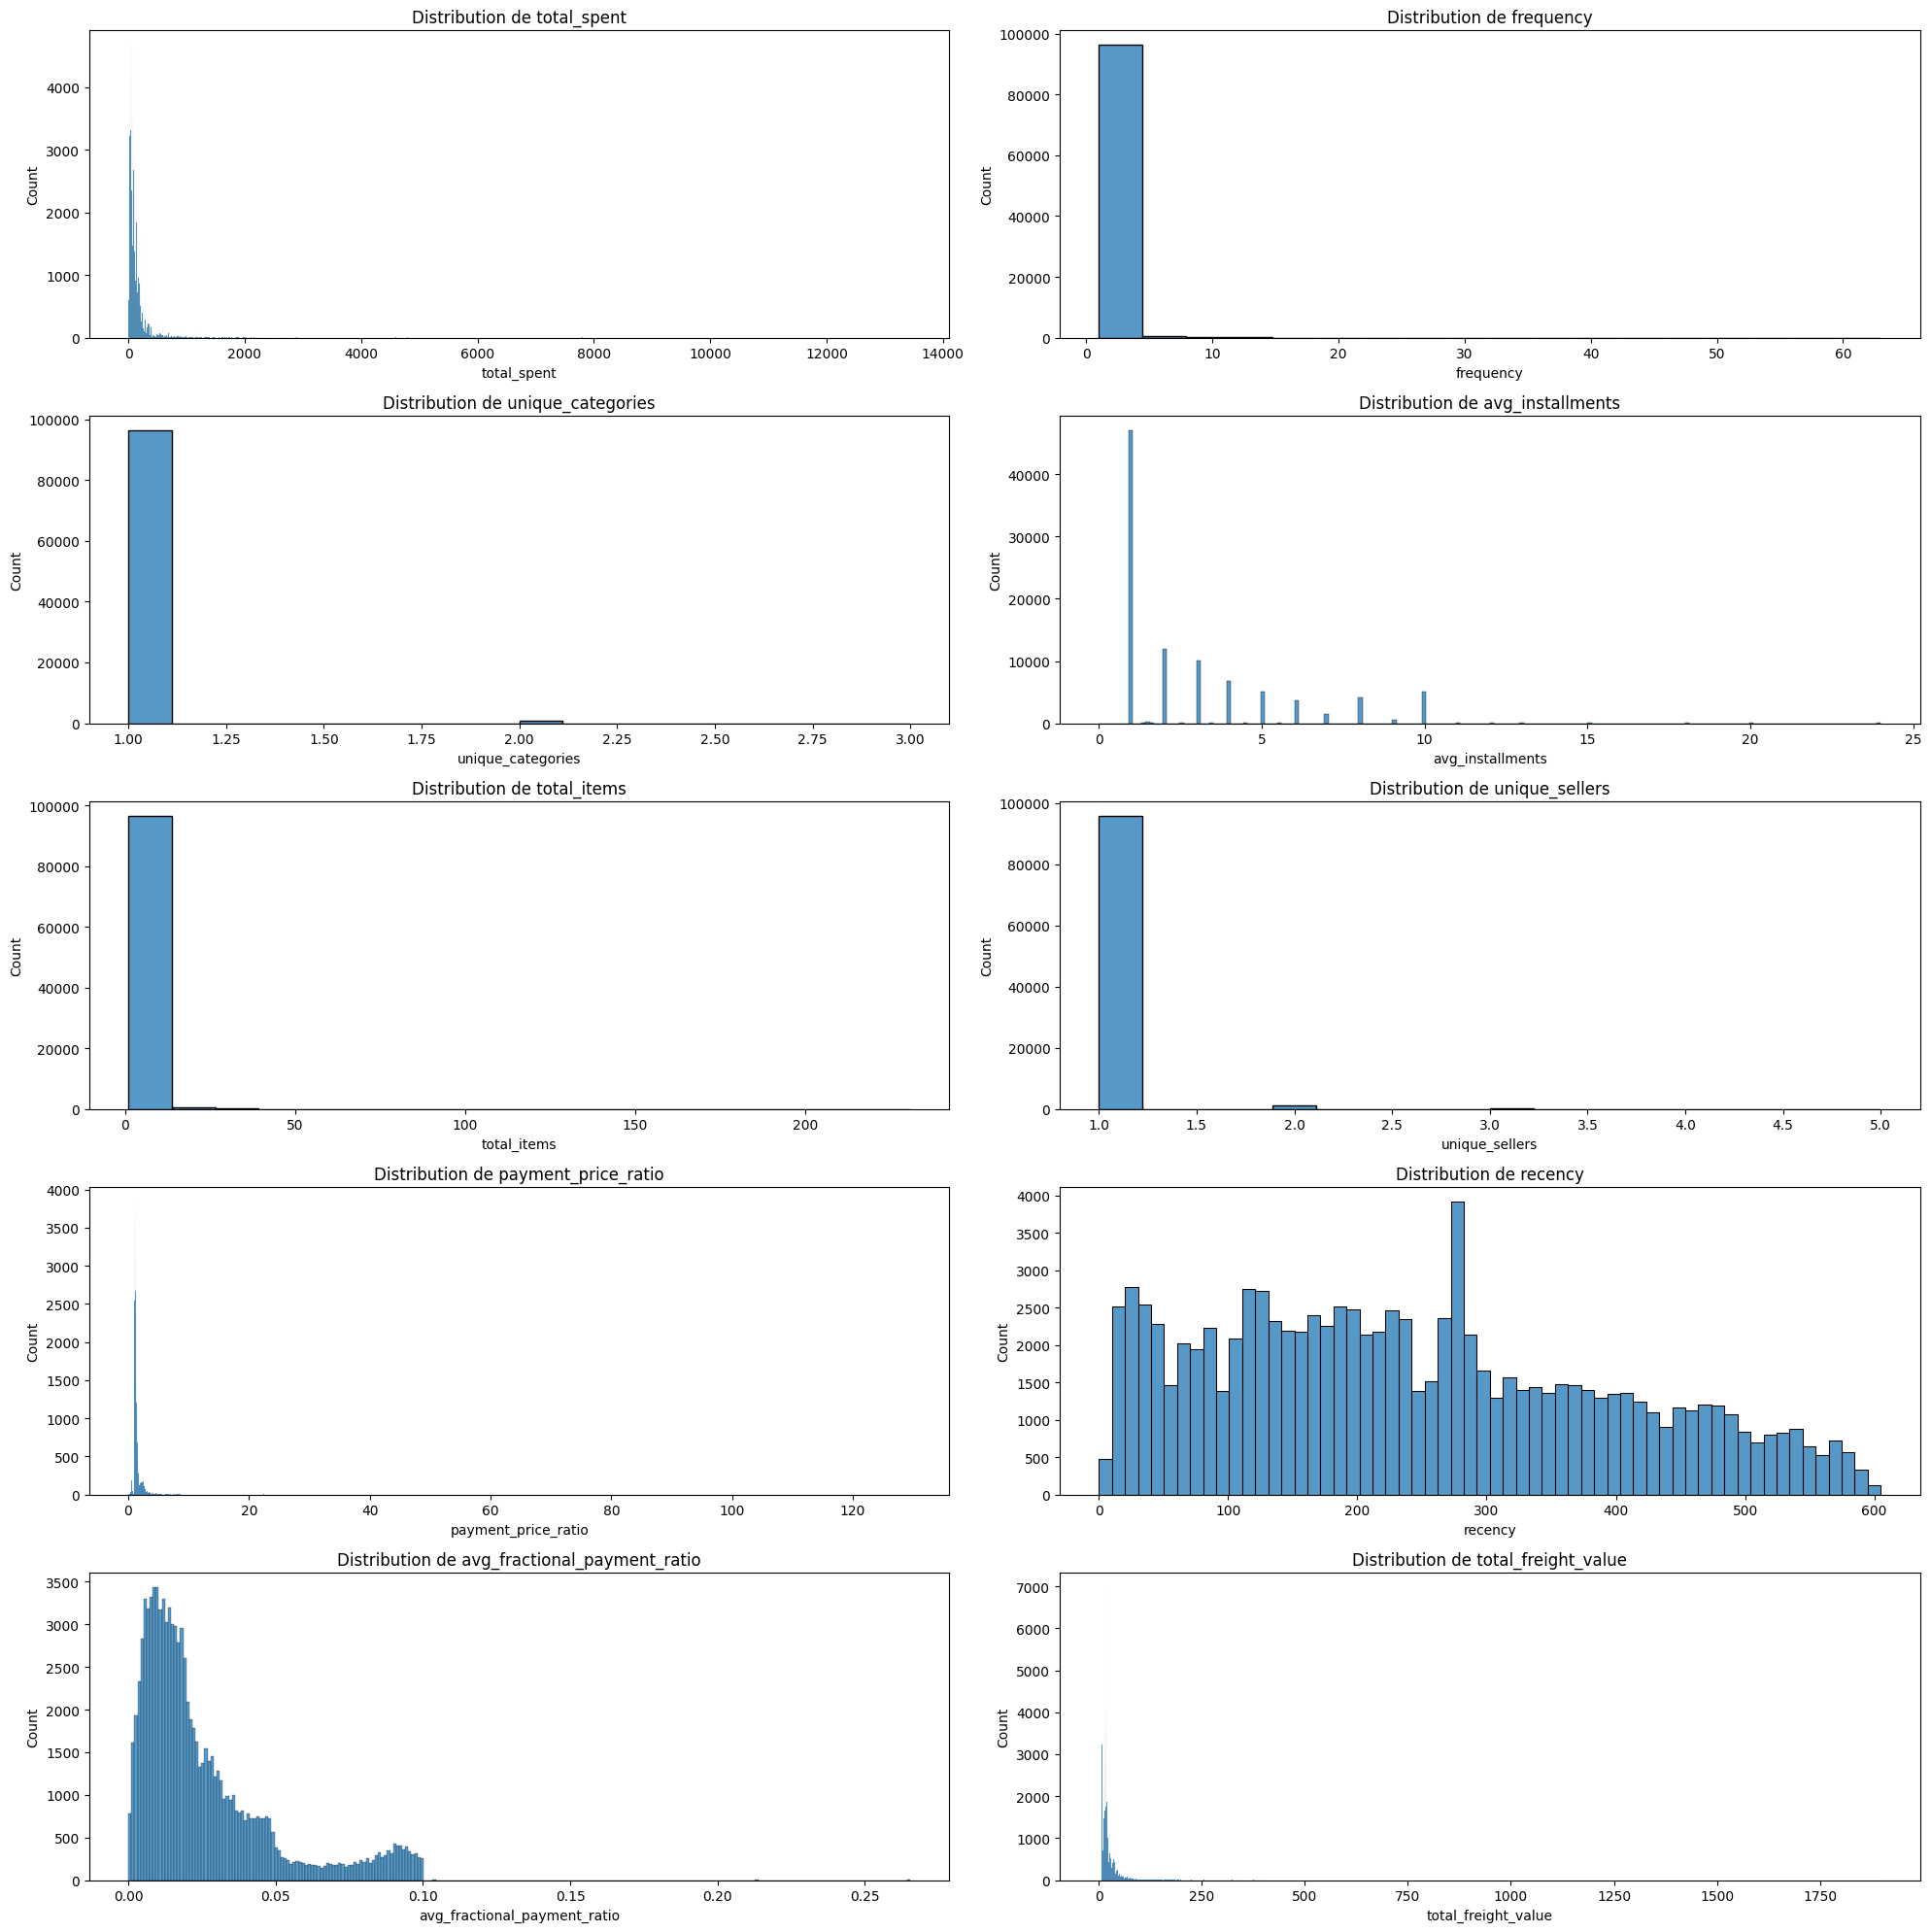

In [54]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))

i = 0
j = 0
for feat in df_features.drop('customer_id', axis=1).columns:
    sns.histplot(df_features[feat], ax=axes[i,j])
    axes[i, j].set_title(f"Distribution de {feat}")
    j += 1
    if j == 2:
        i += 1
        j = 0
    if i == 5:
        break

plt.tight_layout()
plt.show()

### Boxplots des variables

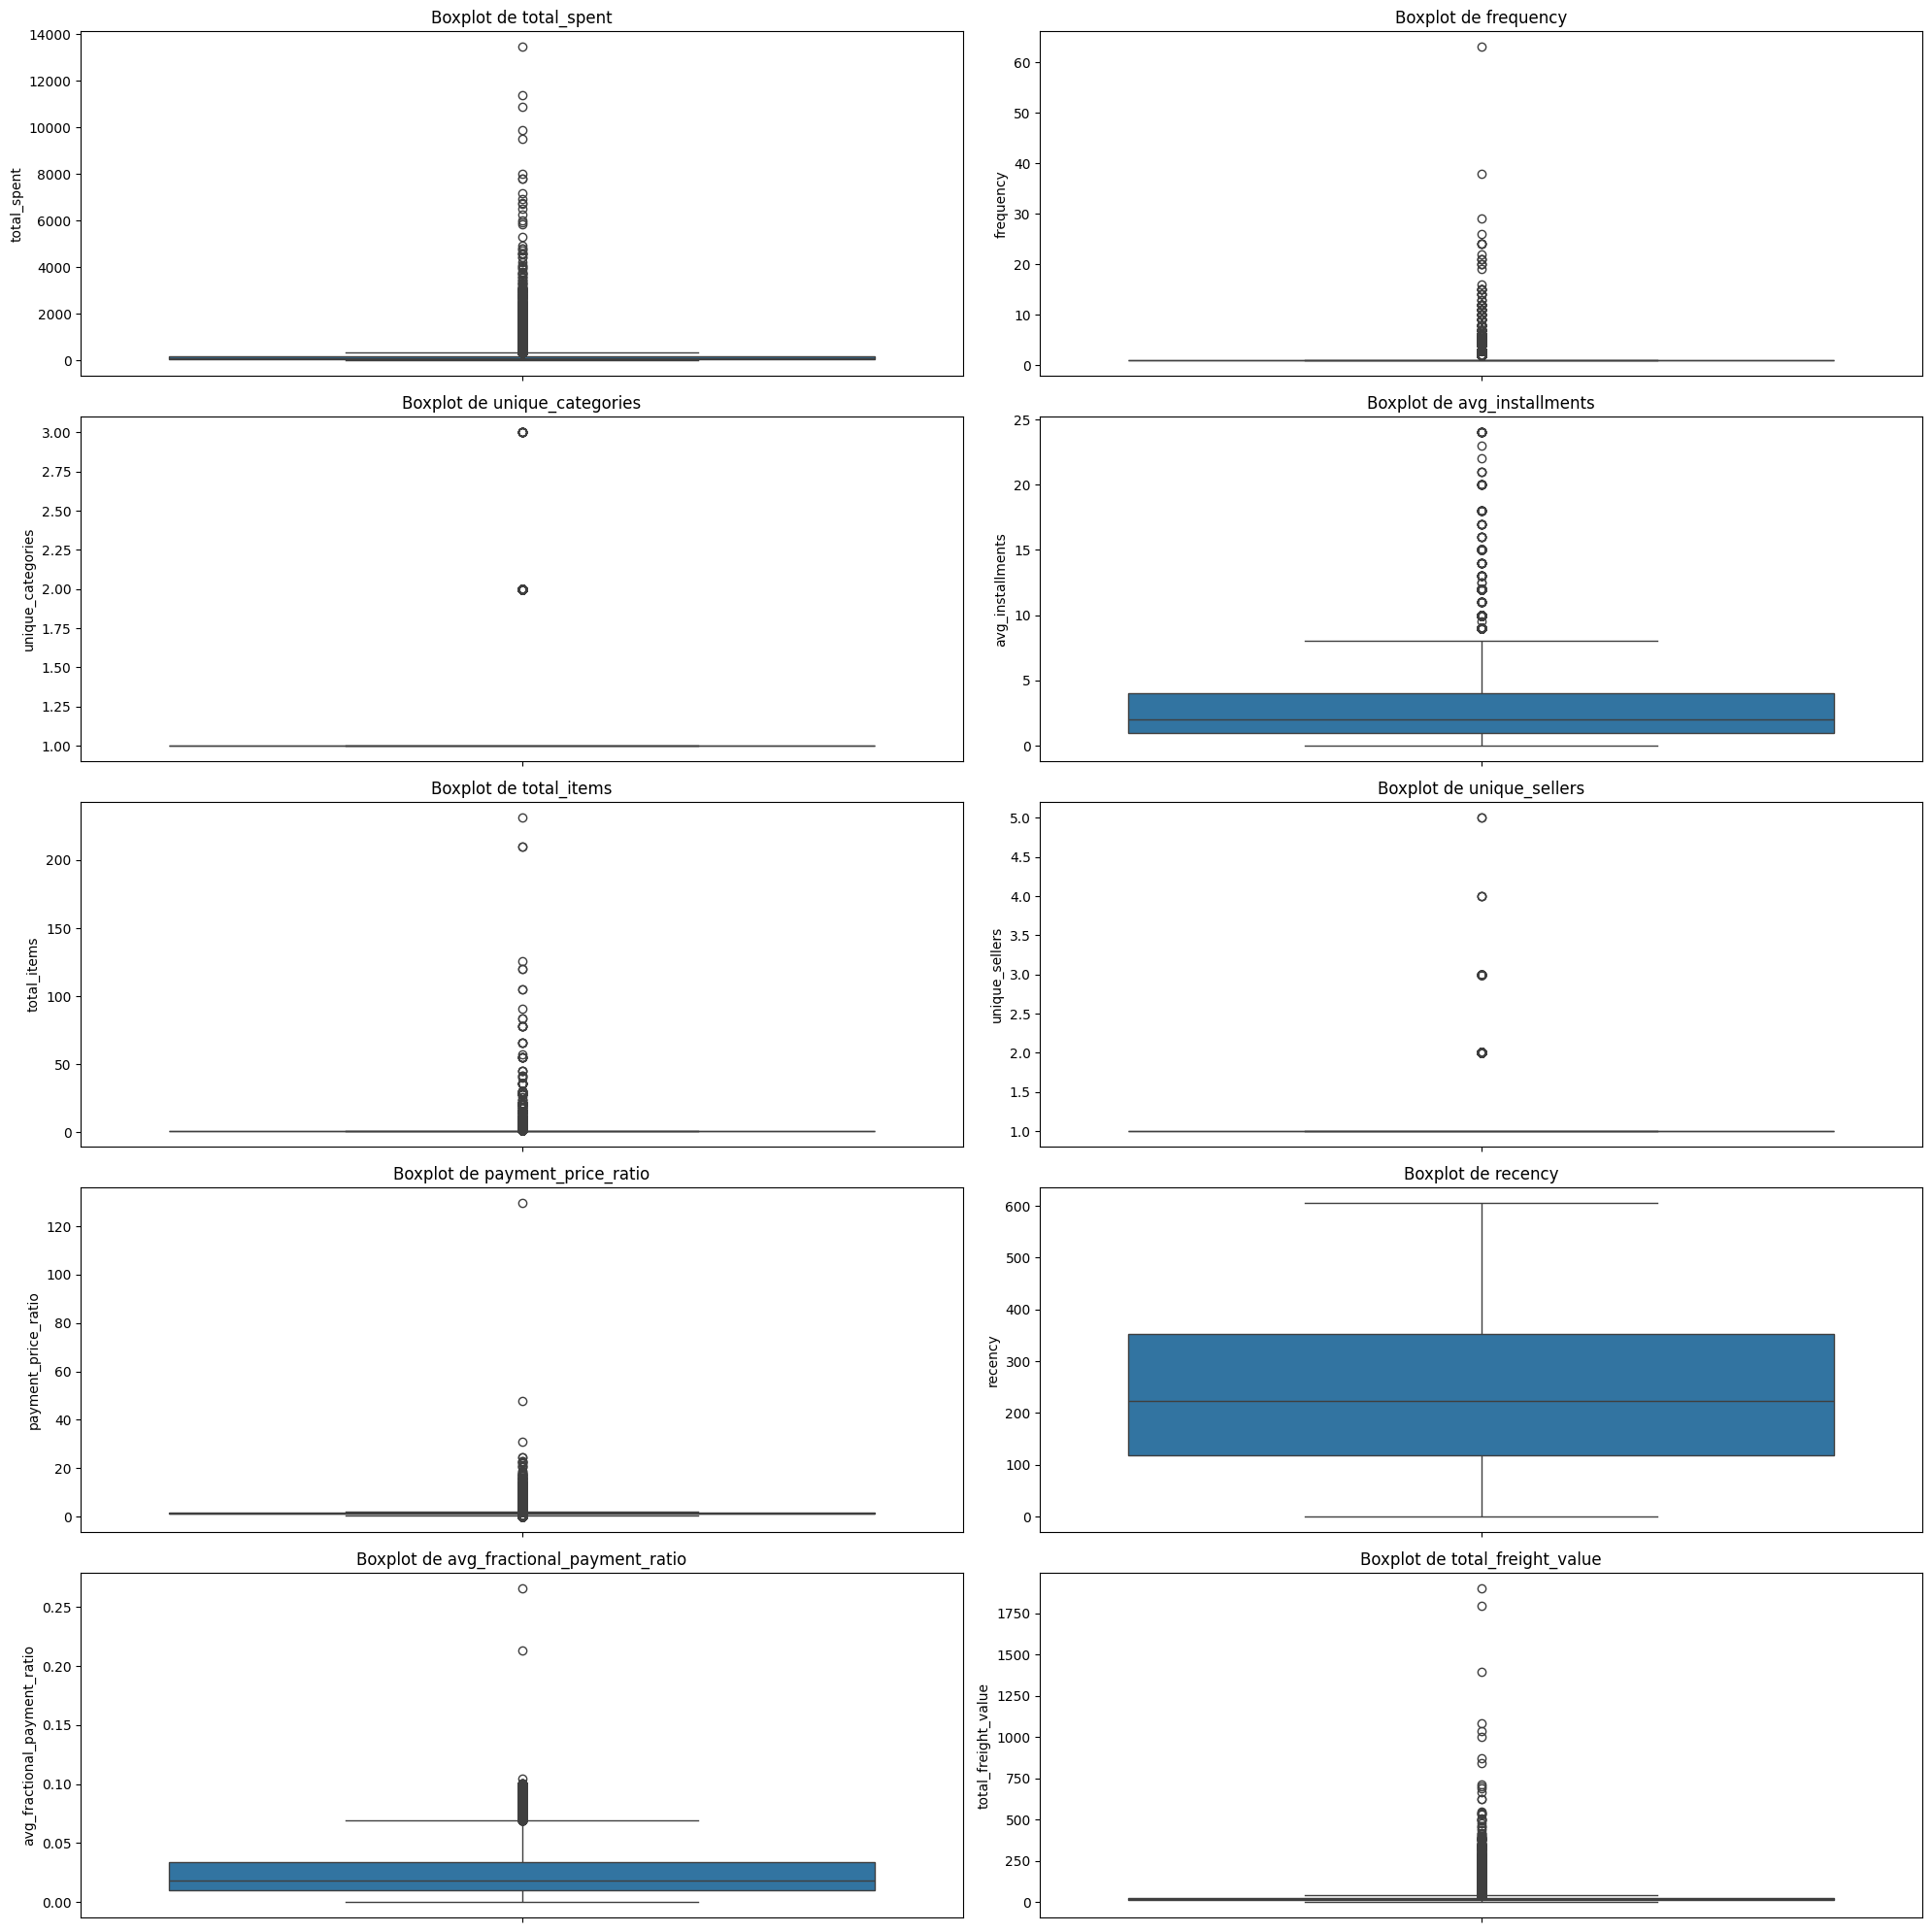

In [55]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))

i = 0
j = 0
for feat in df_features.drop('customer_id', axis=1).columns:
    sns.boxplot(df_features[feat], ax=axes[i,j])
    axes[i, j].set_title(f"Boxplot de {feat}")
    j += 1
    if j == 2:
        i += 1
        j = 0
    if i == 5:
        break

plt.tight_layout()
plt.show()

**Interprétations**

- Total spent

   On peut voir que la majorité des clients dépensent une petite somme d'argent avec quelques clients dépensant des montants beaucoup plus élevés. Le boxplot confirme l'existence de nombreux outliers avec des clients dépensant des montants exceptionnellement élevés.

- Frequency 

   La plupart des clients effectuent très peu d'achats, généralement un ou deux. La distribution diminue rapidement. Le boxplot Montre plusieurs outliers avec des clients effectuant un grand nombre d'achats.

- Unique categories et Unique sellers

   La plupart des clients achètent dans une seule catégorie de produits et auprès d'un seul vendeur. Les boxplots confirme ces tendances avec quelques outliers. Ces variables n'apportent donc pas bcp d'informations nous allons la supprimer du jeu de données

- avg_installements

   La plupart des clients ne choisissent pas de payer en plusieurs fois, mais certains choisissent de payer en plusieurs mensualités. Le boxplot indique la présence d'un grand nombre d'outliers avec des clients choisissant un nombre élevé de mensualités.

- total_items

   La plupart des clients achètent très peu d'articles, souvent un seul. Le boxplot Montre de nombreux outliers où les clients achètent un grand nombre d'articles.
   
- payment_price_ratio

   La majorité des paiements sont très proches du prix initial, mais certains ratios peuvent être beaucoup plus élevés indiquant peut être des réductions. Le boxplot montre plusieurs outliers où le ratio de paiement est exceptionnellement élevé.

- recency

   Les clients montrent une diversité de récence dans leurs achats, avec une répartition uniforme. Le boxplot montre une distribution large sans trop d'outliers significatifs.

- avg_fractional_payment_ratio

   La majorité des clients effectuent des paiements sans fractionnement, mais il y a une diversité dans les ratios fractionnés. Le boxplot montre plusieurs outliers avec des ratios de paiements fractionnés plus élevés.

- total_freight_value

   La majorité des clients paient peu pour la livraison, mais certains frais de livraison sont beaucoup plus élevés. Le boxplot ndique la présence de nombreux outliers où les frais de livraison sont exceptionnellement élevés.

#### Corrélation

In [56]:
df_features.drop(columns=["unique_categories", "unique_sellers"], inplace=True)

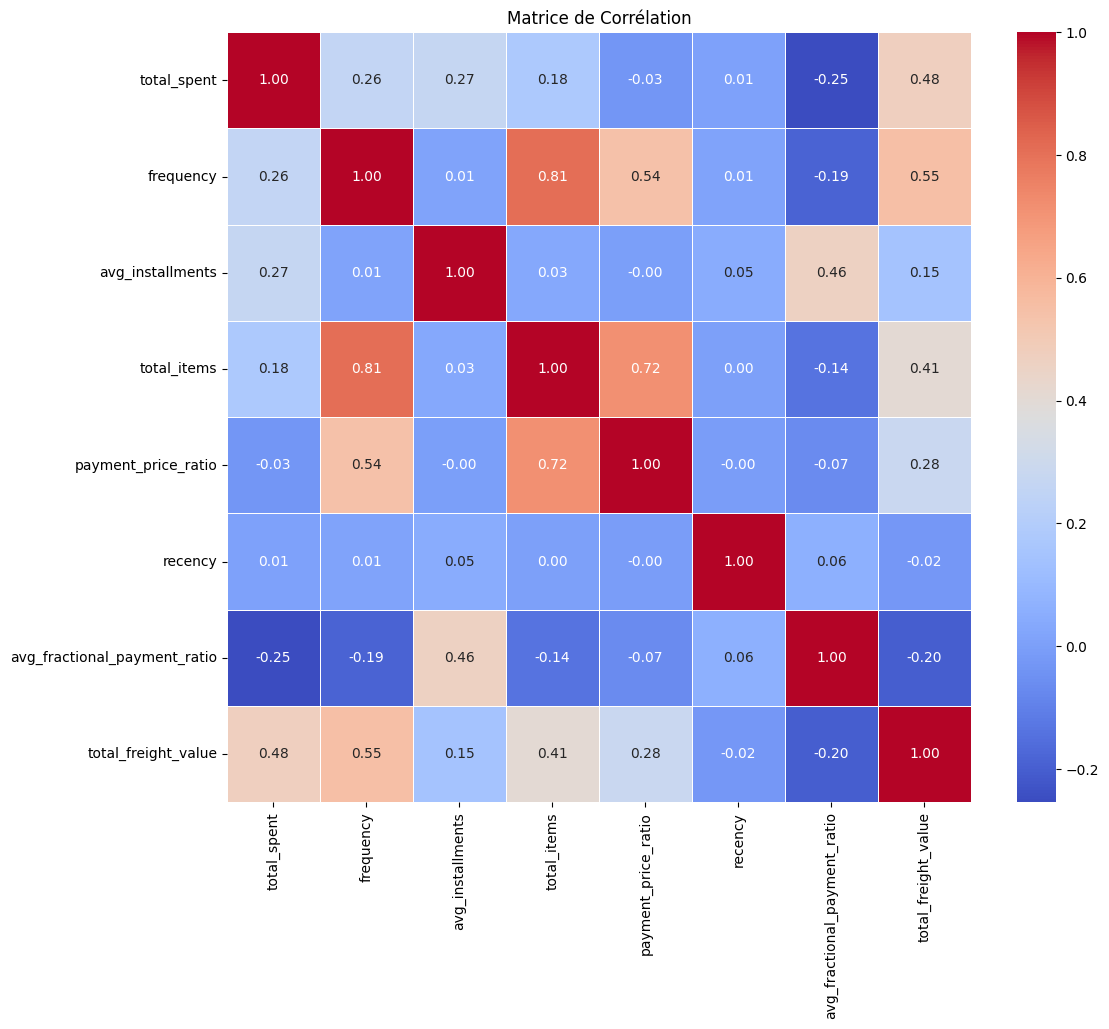

In [57]:
corr_matrix = df_features.drop("customer_id", axis=1).corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

**Interprétations**

Ces corrélations peuvent aider à comprendre les comportements d'achat des clients et à identifier les facteurs qui influencent les dépenses totales et la fréquence d'achat.

1. Corrélations fortes (>0.7) :
   - Fréquence et total_items (0.81), les clients achètent rarement plus d'un item par commandes 
   - Total_items et payment_price_ratio (0.72), les clients achète plusieurs items lors de période de réduction

2. Corrélations modérées (0.4-0.7) :
   - Total_freight_value et plusieurs variables (total_spent, frequency, total_items) : La valeur du transport est modérément liée aux dépenses totales, à la fréquence d'achat et au nombre d'articles.
   - Avg_installments et avg_fractional_payment_ratio (0.46) : Le nombre moyen de versements est modérément corrélé au ratio de paiement fractionné moyen.

3. Corrélations faibles ou négligeables :
   - Recency avec la plupart des autres variables : Cela suggère que la récence des achats n'a pas beaucoup d'impact sur les autres métriques.
   - Total_spent et payment_price_ratio (-0.03) : Pas de lien significatif entre les dépenses totales et le ratio de prix de paiement.

### Sauvegarde du jeu de données

In [58]:
df_features.to_csv(f"{OUTPUTS_DIR}/segmentation_01_analyse_rfm_dataset.csv", index=False)